<a href="https://colab.research.google.com/github/Gurgirl/Certificate/blob/main/SGurule_USL_Project_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# for K-Means
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data.csv')

In [4]:
#copy the dataset to preserve the original
data = df.copy()

In [5]:
# fixing column names
data.columns = [c.replace(" ", "_") for c in data.columns]
data.head()

Ticker_Symbol                 Security             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

## Data Overview

- Observations
- Sanity checks

In [6]:
data.shape

(340, 15)

There are 340 rows, and 15 columns of data.

In [7]:
#view a random sample of the dataset
data.sample(n=10, random_state=1)

Ticker_Symbol                     Security             GICS_Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS_Sub_Industry  Current_Price  Price_Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash_Ratio  Net_Cash_Flow   Net_Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

There are 4 Object type of columns, and 11 Numeric type columns. There are 340 entries in every column. If any graphs require a y-axis, it will be GICS Sector.

In [28]:
pd.set_option('display.float.format', lambda x: '%.3f' %x)
data.describe().T

count           mean            std  \
Current_Price                340.000         80.862         98.055   
Price_Change                 340.000          4.078         12.006   
Volatility                   340.000          1.526          0.592   
ROE                          340.000         39.597         96.548   
Cash_Ratio                   340.000         70.024         90.421   
Net_Cash_Flow                340.000   55537620.588 1946365312.176   
Net_Income                   340.000 1494384602.941 3940150279.328   
Earnings_Per_Share           340.000          2.777          6.588   
Estimated_Shares_Outstanding 340.000  577028337.754  845849595.418   
P/E_Ratio                    340.000         32.613         44.349   
P/B_Ratio                    340.000         -1.718         13.967   

                                          min            25%           50%  \
Current_Price                           4.500         38.555        59.705   
Price_Change                          -47.130         -0.939         4.820   
Volatility                              0.733          1.135         1.386   
ROE                                     1.000          9.750        15.000   
Cash_Ratio                              0.000         18.000        47.000   
Net_Cash_Flow                -11208000000.000 -193906500.000   2098000.000   
Net_Income                   -23528000000.000  352301250.000 707336000.000   
Earnings_Per_Share                    -61.200          1.558         2.895   
Estimated_Shares_Outstanding     27672156.860  158848216.100 309675137.800   
P/E_Ratio                               2.935         15.045        20.820   
P/B_Ratio                             -76.119         -4.352        -1.067   

                                        75%             max  
Current_Price                        92.880        1274.950  
Price_Change                         10.695          55.052  
Volatility                            1.696           4.580  
ROE                                  27.000         917.000  
Cash_Ratio                           99.000         958.000  
Net_Cash_Flow                 169810750.000 20764000000.000  
Net_Income                   1899000000.000 24442000000.000  
Earnings_Per_Share                    4.620          50.090  
Estimated_Shares_Outstanding  573117457.325  6159292035.000  
P/E_Ratio                            31.765         528.039  
P/B_Ratio                             3.917         129.065

Observations: The average stock price is 80.82, with some as low as 4.50 and max shows as 1275. 3/4 of these stocks though, are priced under 93 dollars. Some price changes have been as drastic as -47, up to +55, with an average change of 4 dollars. The average volatility of these stocks in 1.52. Average ROE is ~40, with a wide range of values from 1-917. There is again, a wide variety of a Cash Ratio - a company's total cash and equivalents to its liabilities, between 0-958, but with an average of 70. Net Income of Companies also has a large range, which is to be expected, but an average of 1,500,000,000, which is a lot. Earning per share has an average of 2.77 dollars, which seems like a stock market standard, so I think this is a good sampling of companies. These companies have many shares outstanding, which again is an industry standard. P/E ratio average is 32.61 and P/B ratio is -1.7, and we'd like both of these numbers to be as small as possible.

Such high maximum numbers shows that there may be some outliers in the data. We'll check that in the EDA.

In [10]:
data.describe(include=[object]).T

count unique                                 top freq
Ticker_Symbol       340    340                                 AAL    1
Security            340    340             American Airlines Group    1
GICS_Sector         340     11                         Industrials   53
GICS_Sub_Industry   340    104  Oil & Gas Exploration & Production   16

Because of the types of models we are making, we'll need to drop the Ticker Symbol, Security, and GICS Sub Industry columns since they consist of all or mostly unique entries. This much information slows down the models and doesn't give much meaningful information in the end. We can most likely get good matches of types of stocks to buy from the GICS Sector column alone. I'll double check the Sub Industry though just to make sure.

In [15]:
for col in data:
  print(data['GICS_Sub_Industry'].unique())

['Airlines' 'Pharmaceuticals' 'Health Care Equipment'
 'Application Software' 'Semiconductors' 'Agricultural Products'
 'Data Processing & Outsourced Services' 'MultiUtilities'
 'Electric Utilities' 'Life & Health Insurance'
 'Property & Casualty Insurance' 'REITs' 'Multi-line Insurance'
 'Insurance Brokers' 'Internet Software & Services' 'Specialty Chemicals'
 'Building Products' 'Biotechnology' 'Semiconductor Equipment'
 'Electrical Components & Equipment' 'Asset Management & Custody Banks'
 'Specialized REITs' 'Internet & Direct Marketing Retail'
 'Specialty Stores' 'Managed Health Care'
 'Oil & Gas Exploration & Production' 'Electronic Components'
 'Aerospace & Defense' 'Home Entertainment Software' 'Residential REITs'
 'Water Utilities' 'Consumer Finance' 'Banks'
 'Oil & Gas Equipment & Services' 'Metal & Glass Containers'
 'Health Care Distributors' 'Auto Parts & Equipment'
 'Construction & Farm Machinery & Heavy Trucks' 'Real Estate Services'
 'Hotels, Resorts & Cruise Lines' 'F

In [16]:
data.GICS_Sub_Industry.value_counts()

Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Diversified Chemicals                               5
Consumer Finance                                    5
Integrated Oil & Gas                                5
Industrial Machinery        

In [17]:
# We'll go ahead and drop the Ticker Symbol, Company Name, and Sub Industry columns
data = data.drop(['Ticker_Symbol', 'Security', 'GICS_Sub_Industry'], axis=1)
data.head()

GICS_Sector  Current_Price  Price_Change  Volatility  ROE  \
0             Industrials      42.349998      9.999995    1.687151  135   
1             Health Care      59.240002      8.339433    2.197887  130   
2             Health Care      44.910000     11.301121    1.273646   21   
3  Information Technology      93.940002     13.977195    1.357679    9   
4  Information Technology      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

There are now 12 columns instead of 15.

I'm not going to group any of these columns, because I think they all have some information to offer.

In [18]:
data.duplicated().sum()

0

There are no duplicated entries in the dataset.

In [19]:
(data.Earnings_Per_Share ==0).sum()

0

In [20]:
(data.Current_Price == 0).sum()

0

Double check that there are no null values. Earnings and Current Price seem like a good column to check this in.

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis

In [21]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(25, 20))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

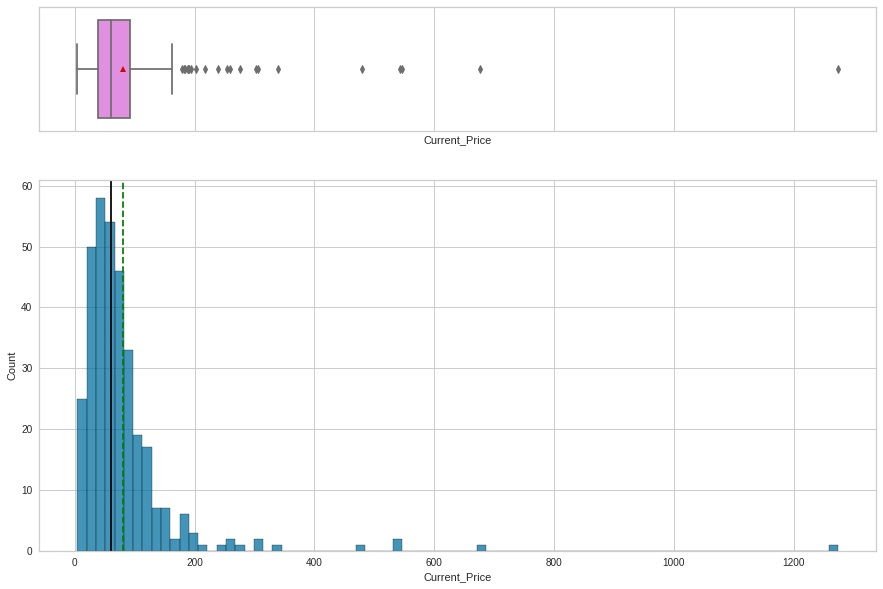

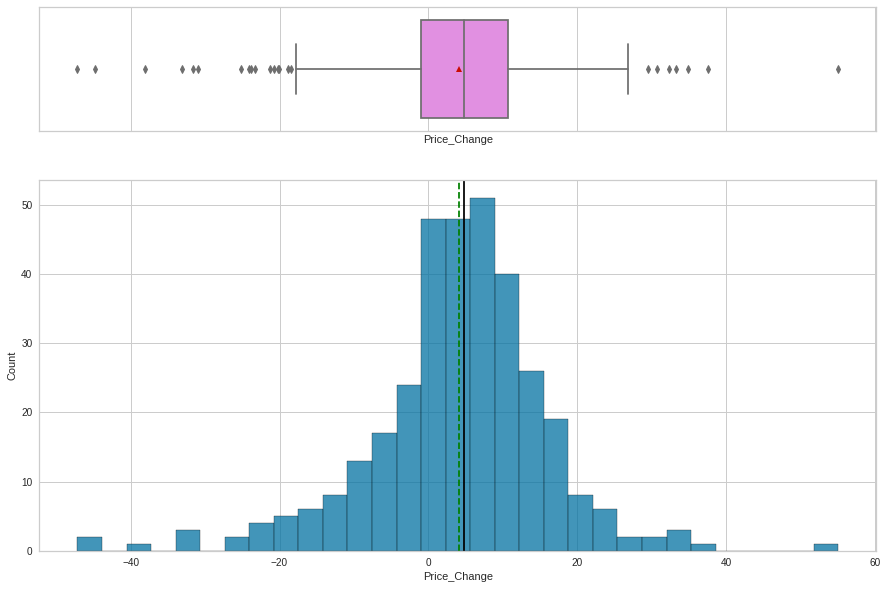

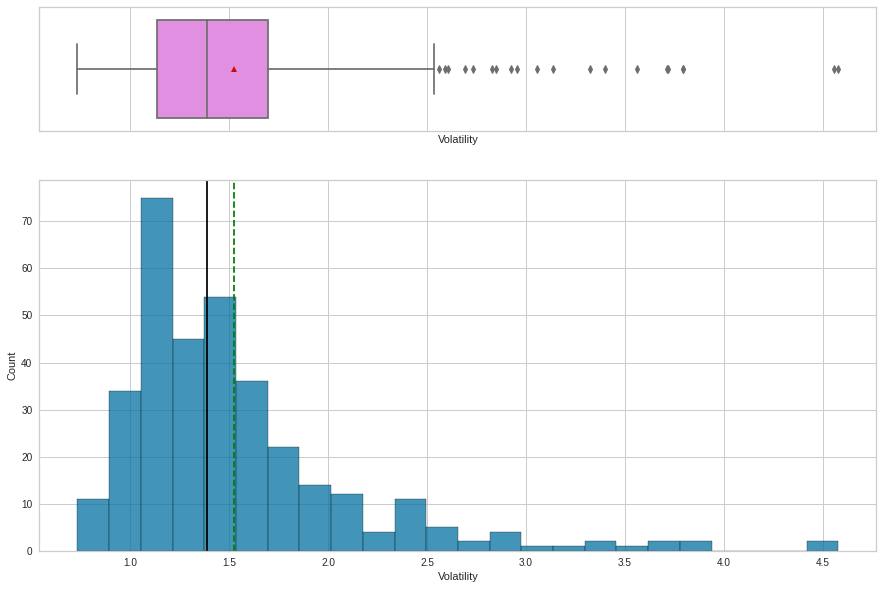

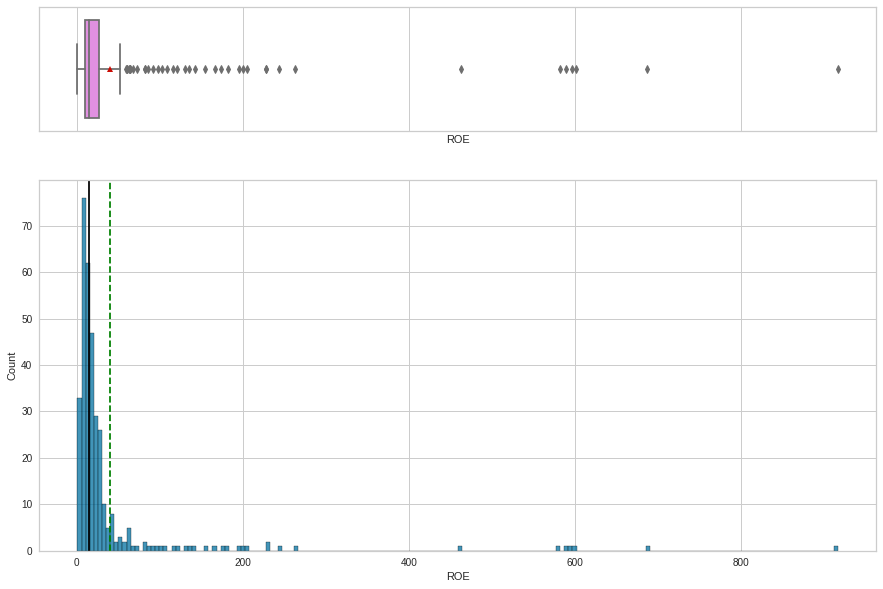

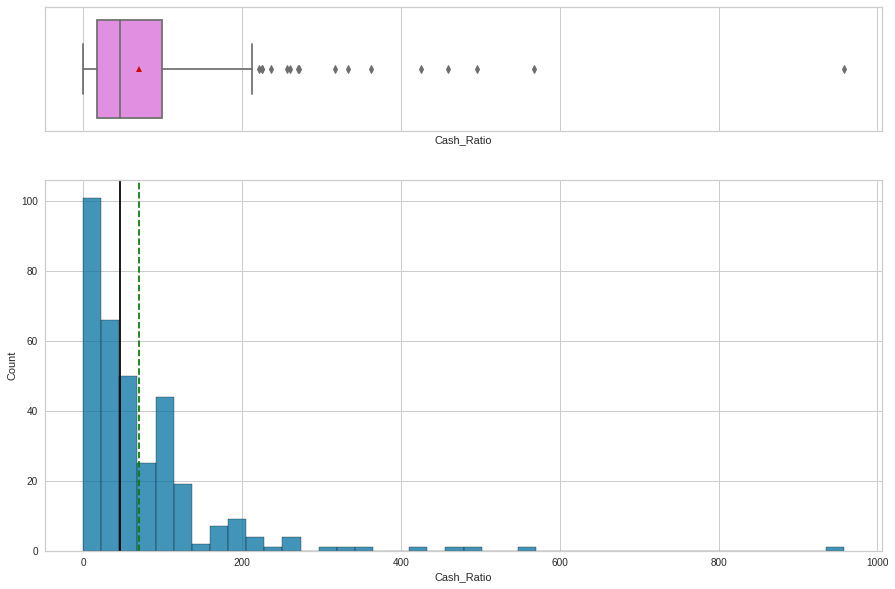

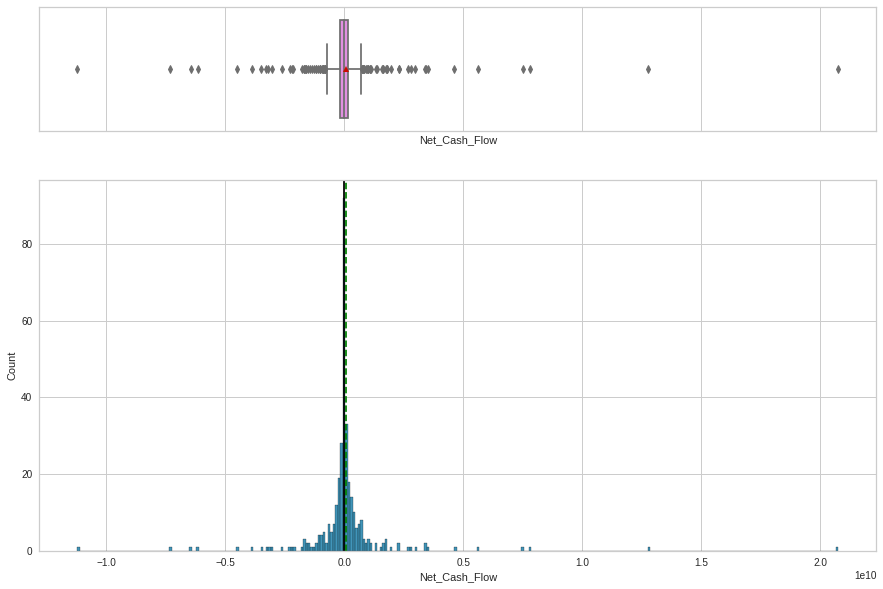

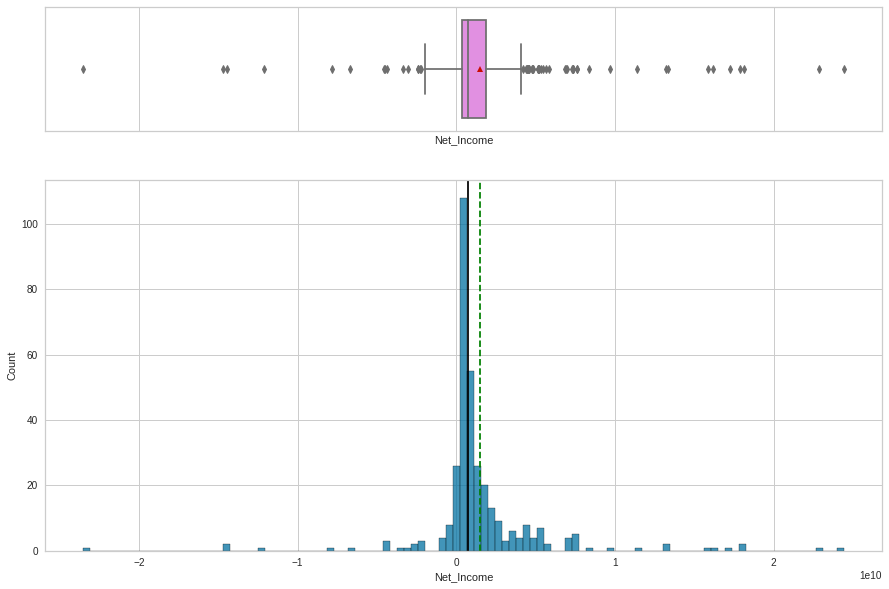

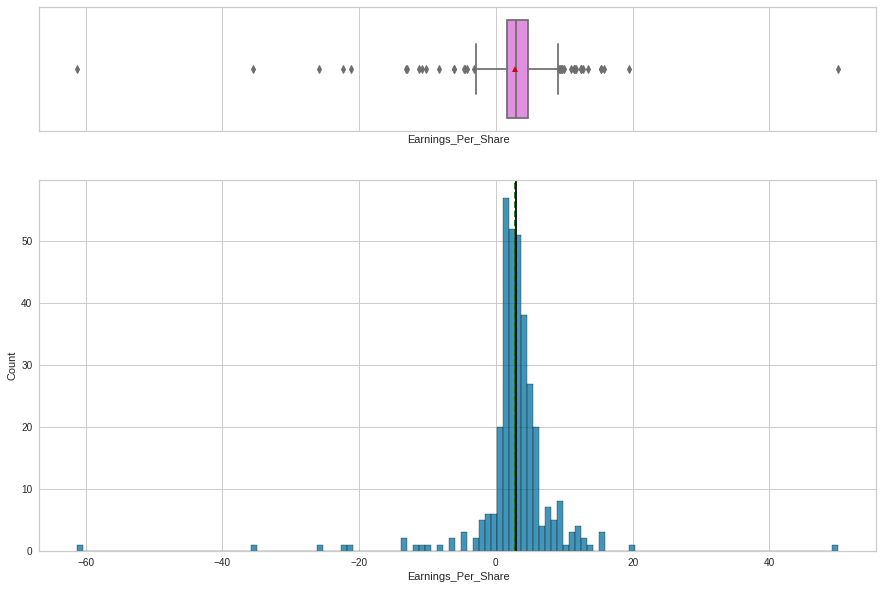

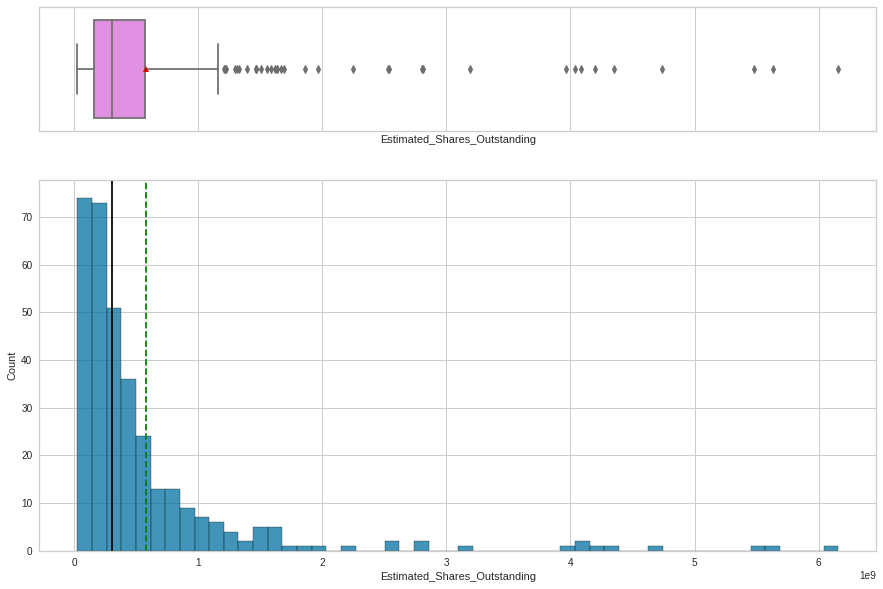

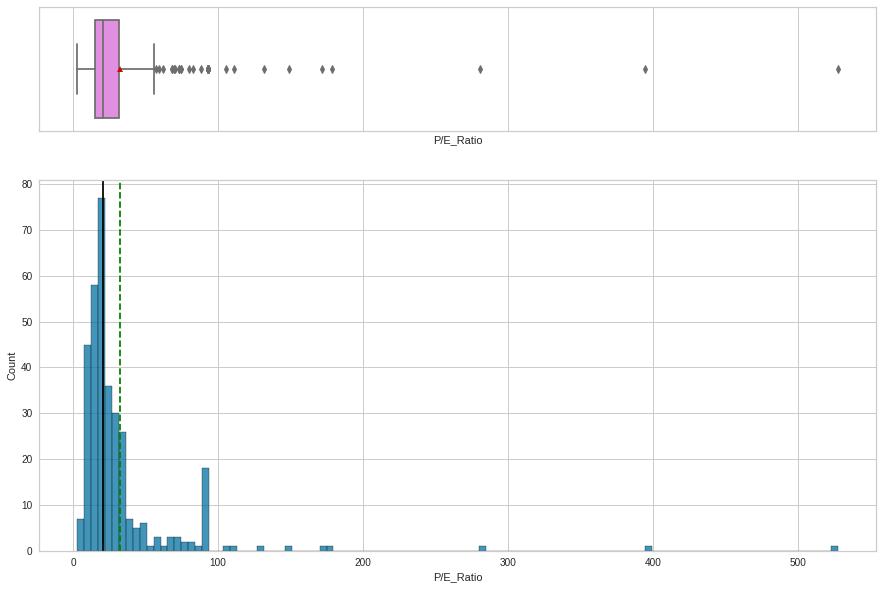

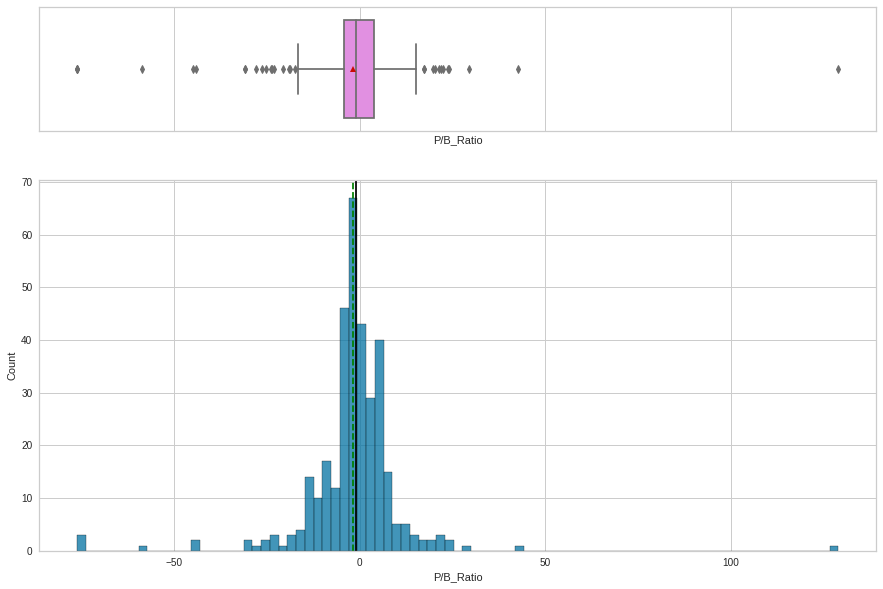

In [25]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item)

These visualizations are helpful for the Observations made above. We can see here that there are many outliers in all the columns, so we'll convert those to show in a more appropriate quartile range.

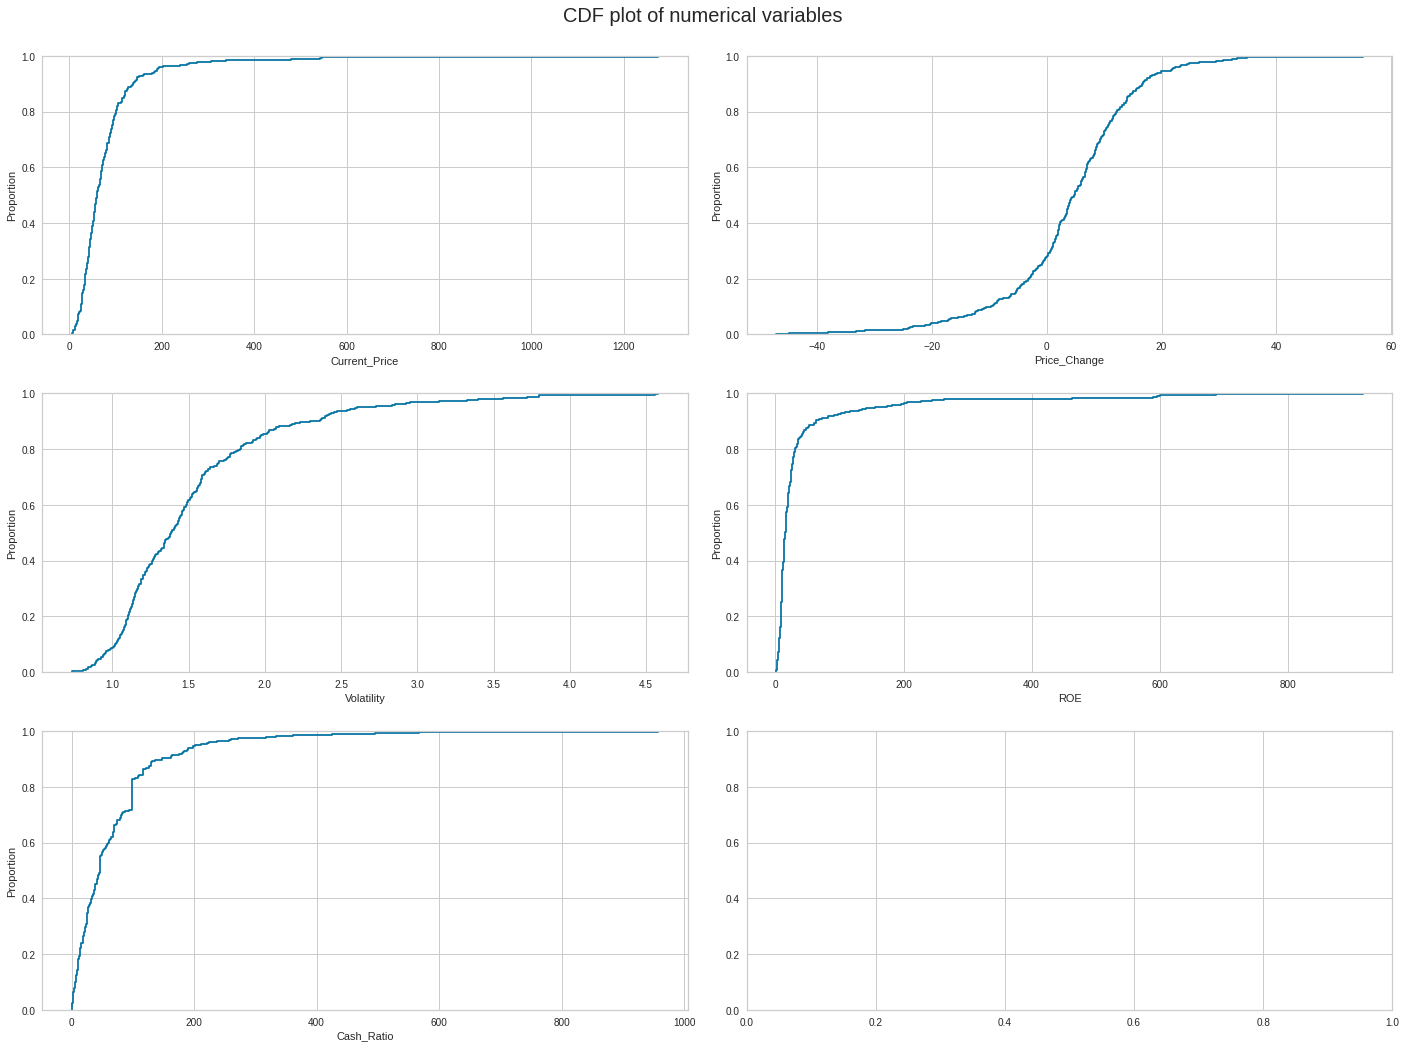

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

This shows where some of the natural elbows of the data are, and how high and steep they rise. These graphs are sensitive to outliers.

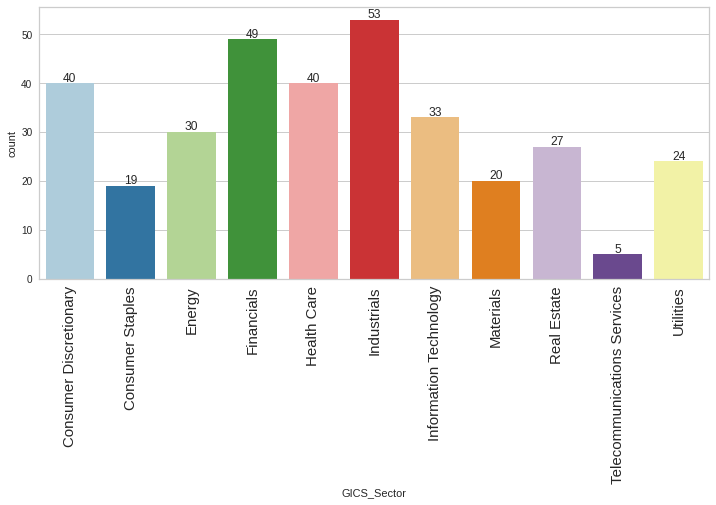

In [27]:
labeled_barplot(data, "GICS_Sector")

After dropping the other columsn, I believe these Sectors will give a good idea of where investing should be done based on the clustering the models will give. We can see here how the initial data represents the different industries. It is heavy towards Industrials, Financials, and Consumer Discretionary, with not many representing Telecommunications, Consumer Staples, and Materials.

##Bivariate Analysis

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

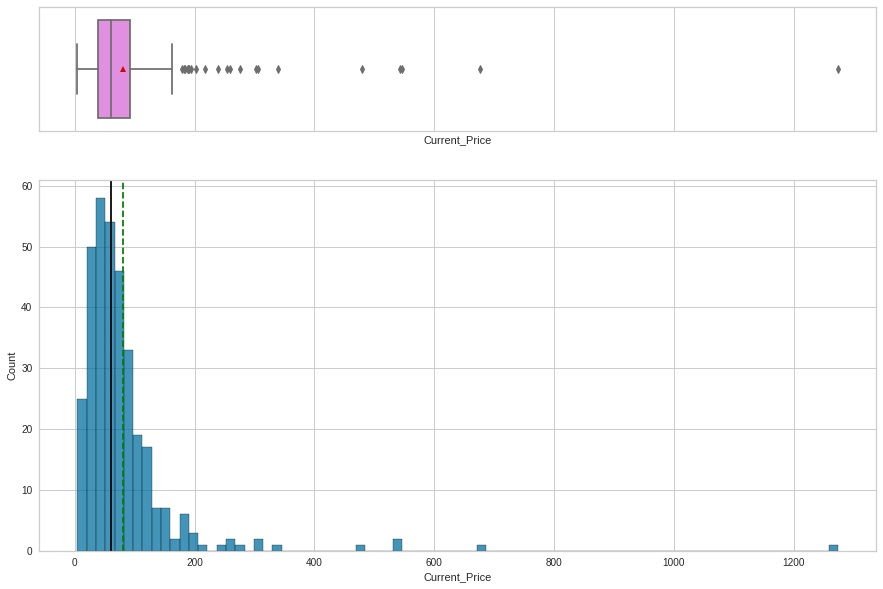

In [29]:
#1 What does the distribution of stock prices look like?
histogram_boxplot(data, "Current_Price")

The stock prices have a right skewed normal distribution, with the majority of them under $100 per share. There are some outliers that need to be treated.

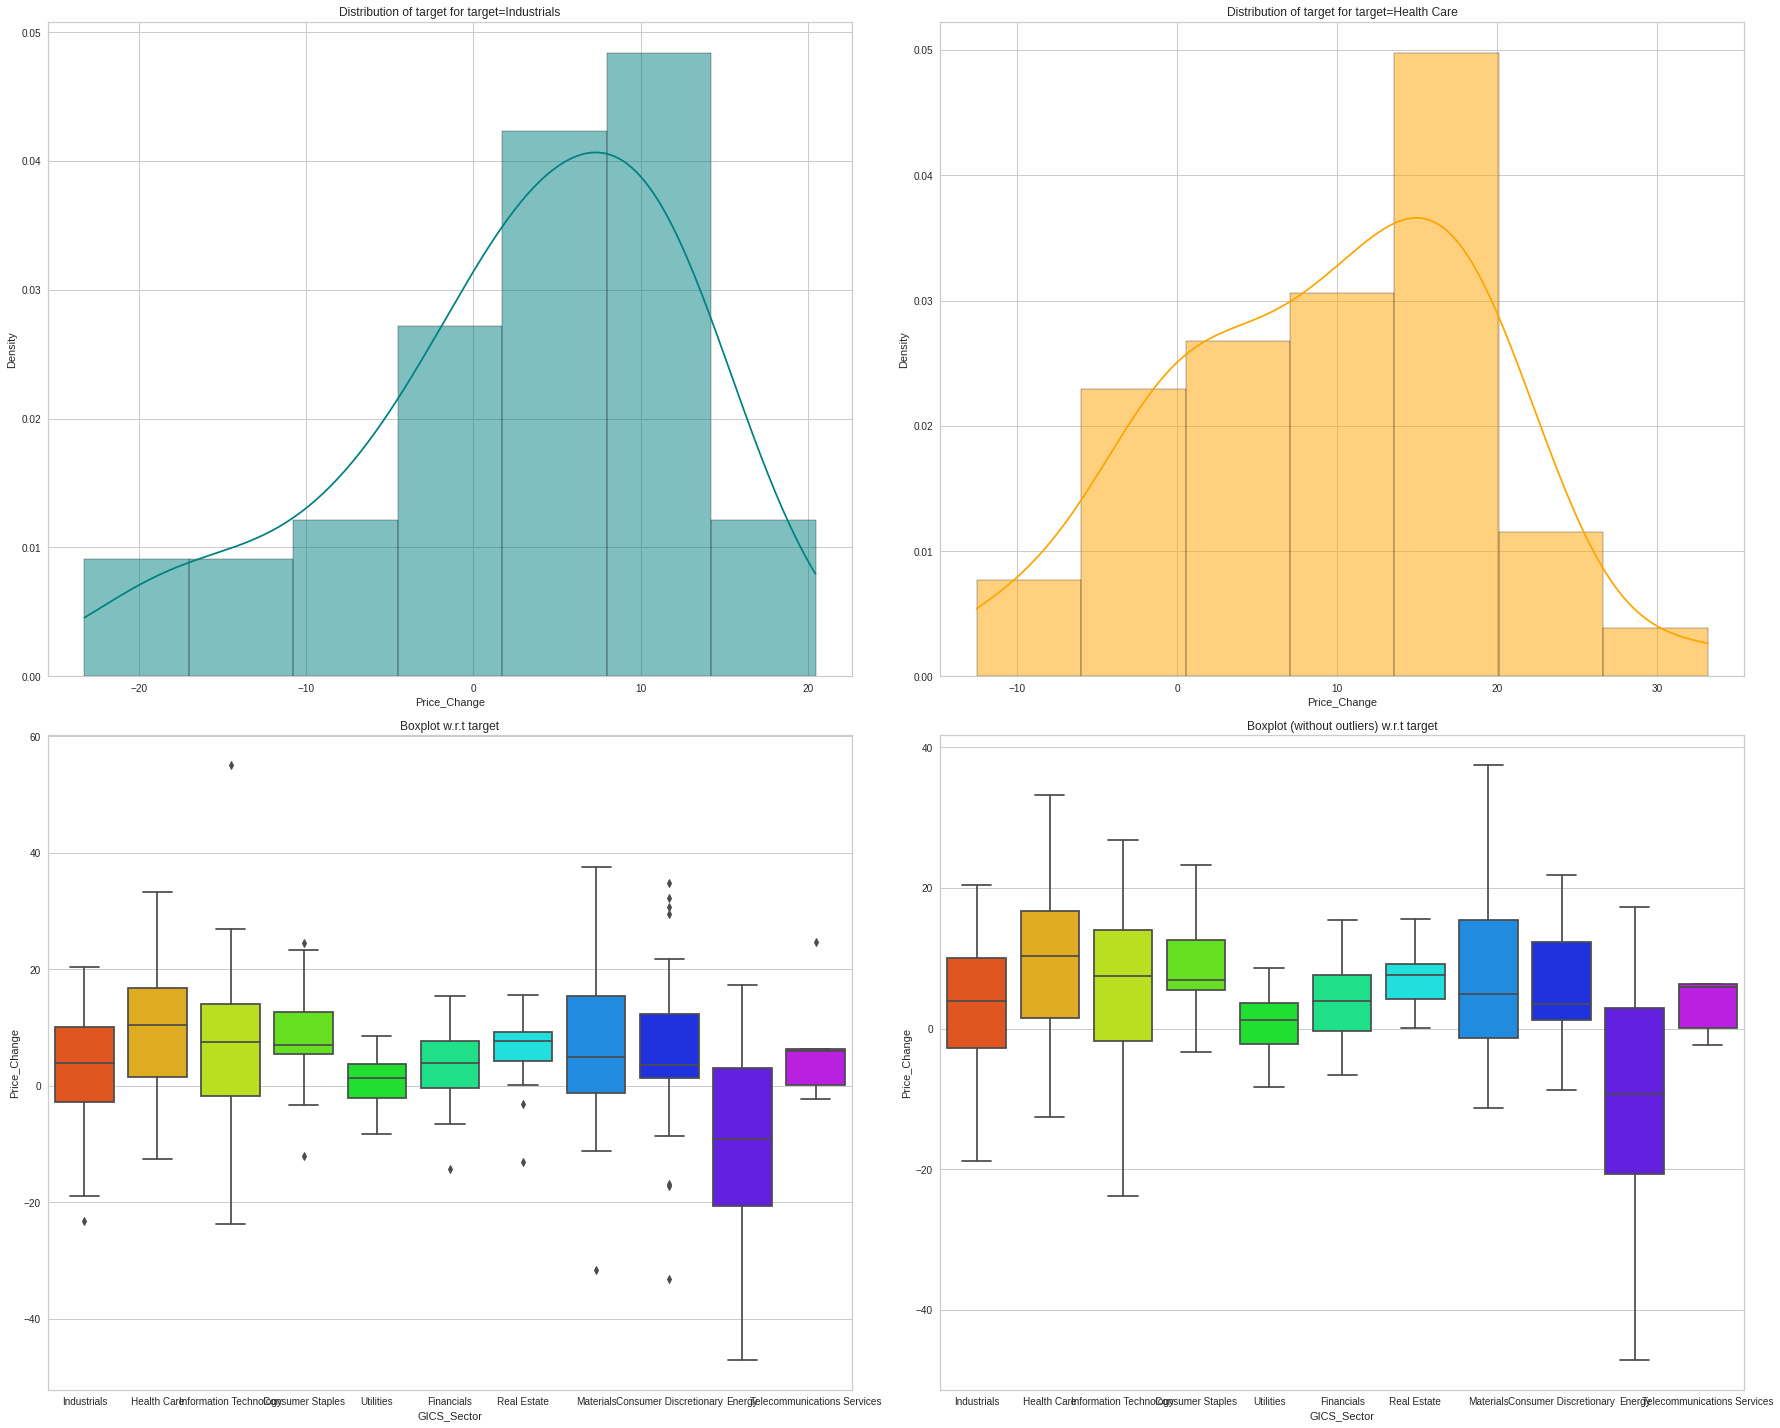

In [30]:
#2 The stocks of which econoic sector have seen the maximum price increase on average?
distribution_plot_wrt_target(data, "Price_Change", "GICS_Sector")

Materials, Health Care, and Consumer Discretionary have seen the largest price increase, with an average of $10 over 13 weeks.

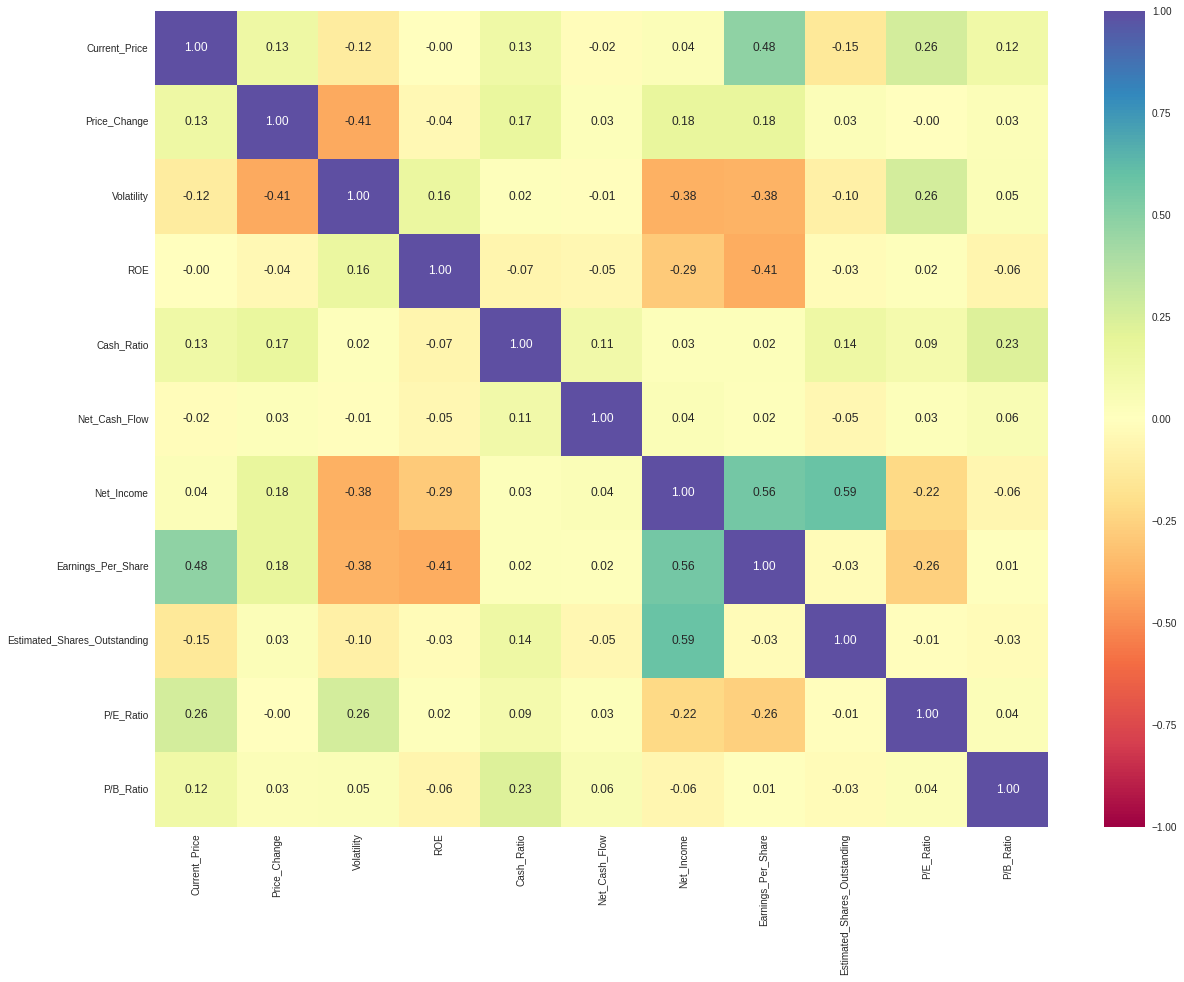

In [31]:
#3 How are the different variables correlated with each other?

plt.figure(figsize=(20, 15))
sns.heatmap(data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Some of the highest correlations are Net Income and Estimated Shares Outstanding, Net Income and Earnings per Share, Current Price and Earnings per Share. Other fairly high correlations are P/E Ratio and Current Price, Cash Ratio and Current Price, Volatility and P/E Ratio, Cash Ratio and P/B Ratio. Some items that are have negative correlations are Earnings per Share and Volatility, Net Income and Volatility, ROE and Earnings per Share, and Price Change and Volatility.

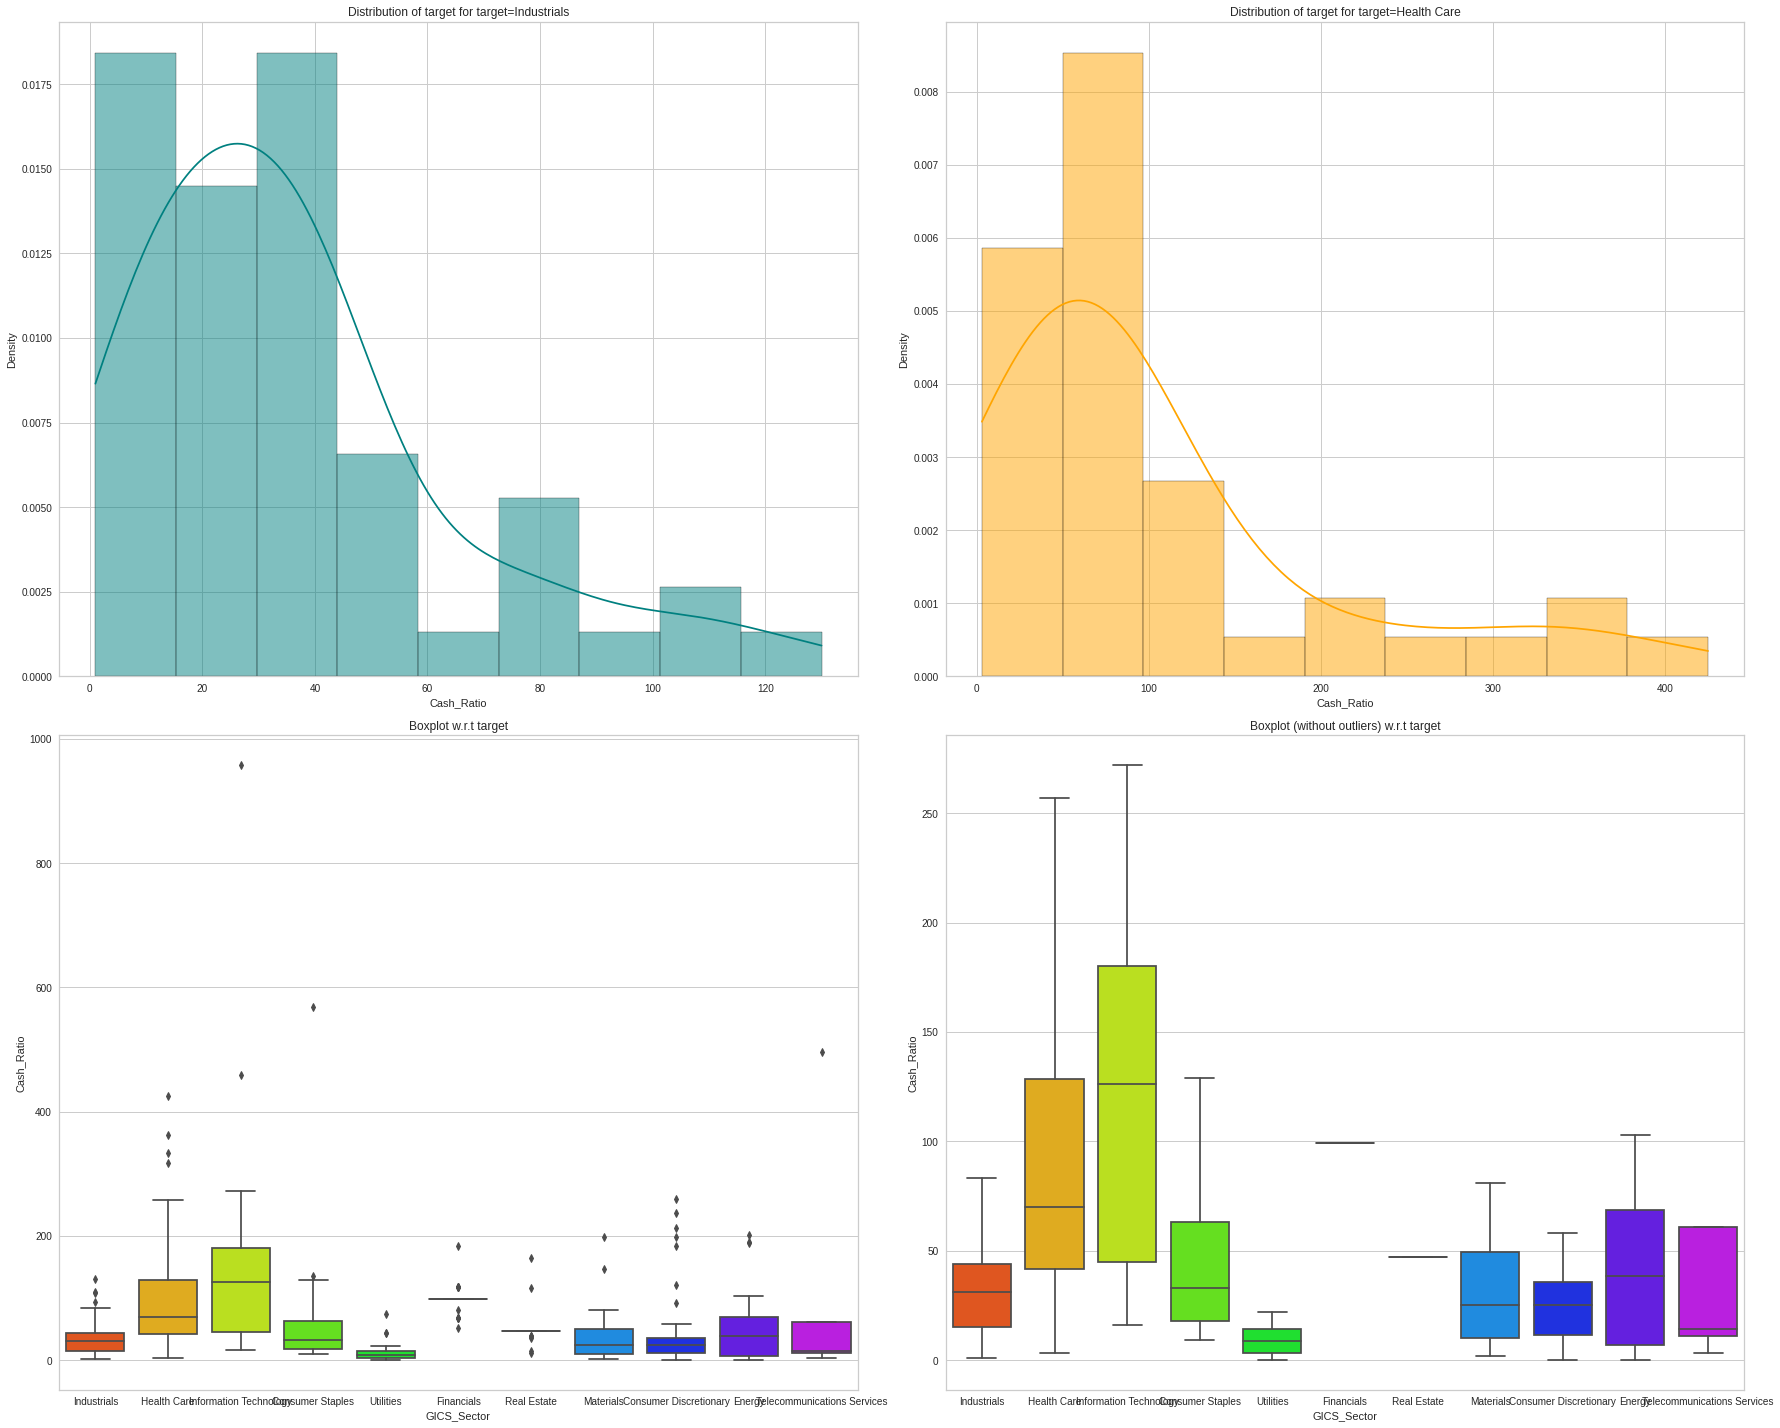

In [32]:
#4 Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

distribution_plot_wrt_target(data, "Cash_Ratio", "GICS_Sector")

Financials and Real Estate have surprisingly little data the smallest amount of Cash/Equivalents vs. liabilities. Utilites and Consumer Discretionary have the next least. The companies that have liabilities covered with cash the best are Health Care and Information Technology.

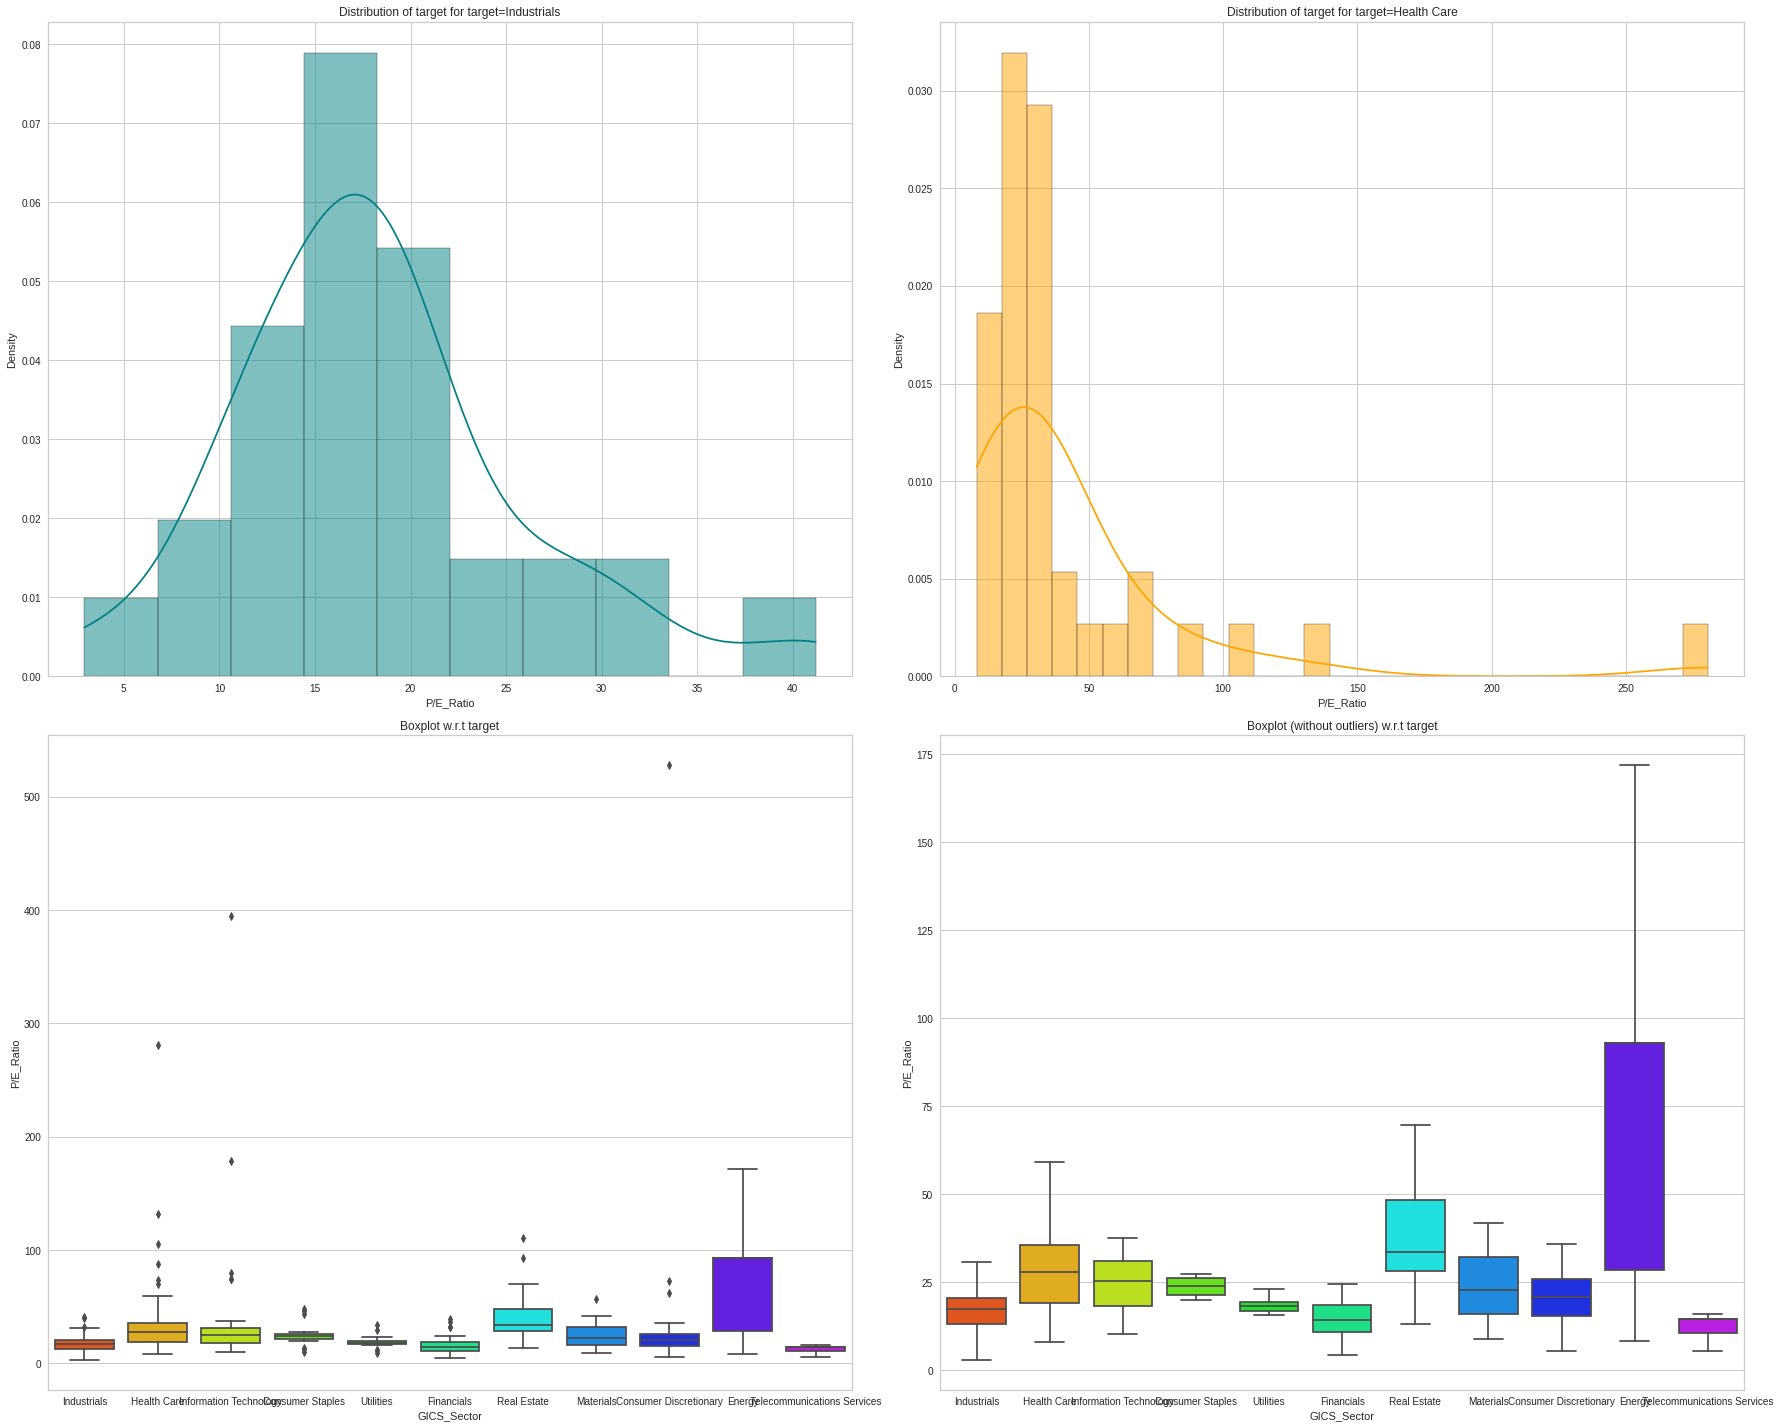

In [33]:
#5 P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. 
# How does the P/E ratio vary, on average, across economic sectors?

distribution_plot_wrt_target(data, "P/E_Ratio", "GICS_Sector")

Industrials, Financials, and Telecommunication have the smallest P/E ratios, which means that investors have to invest the least amount compared to earnings per dollar. Energy, Real Estate, and Health Care had the highest P/E which means that investors invest more compared to its earning.

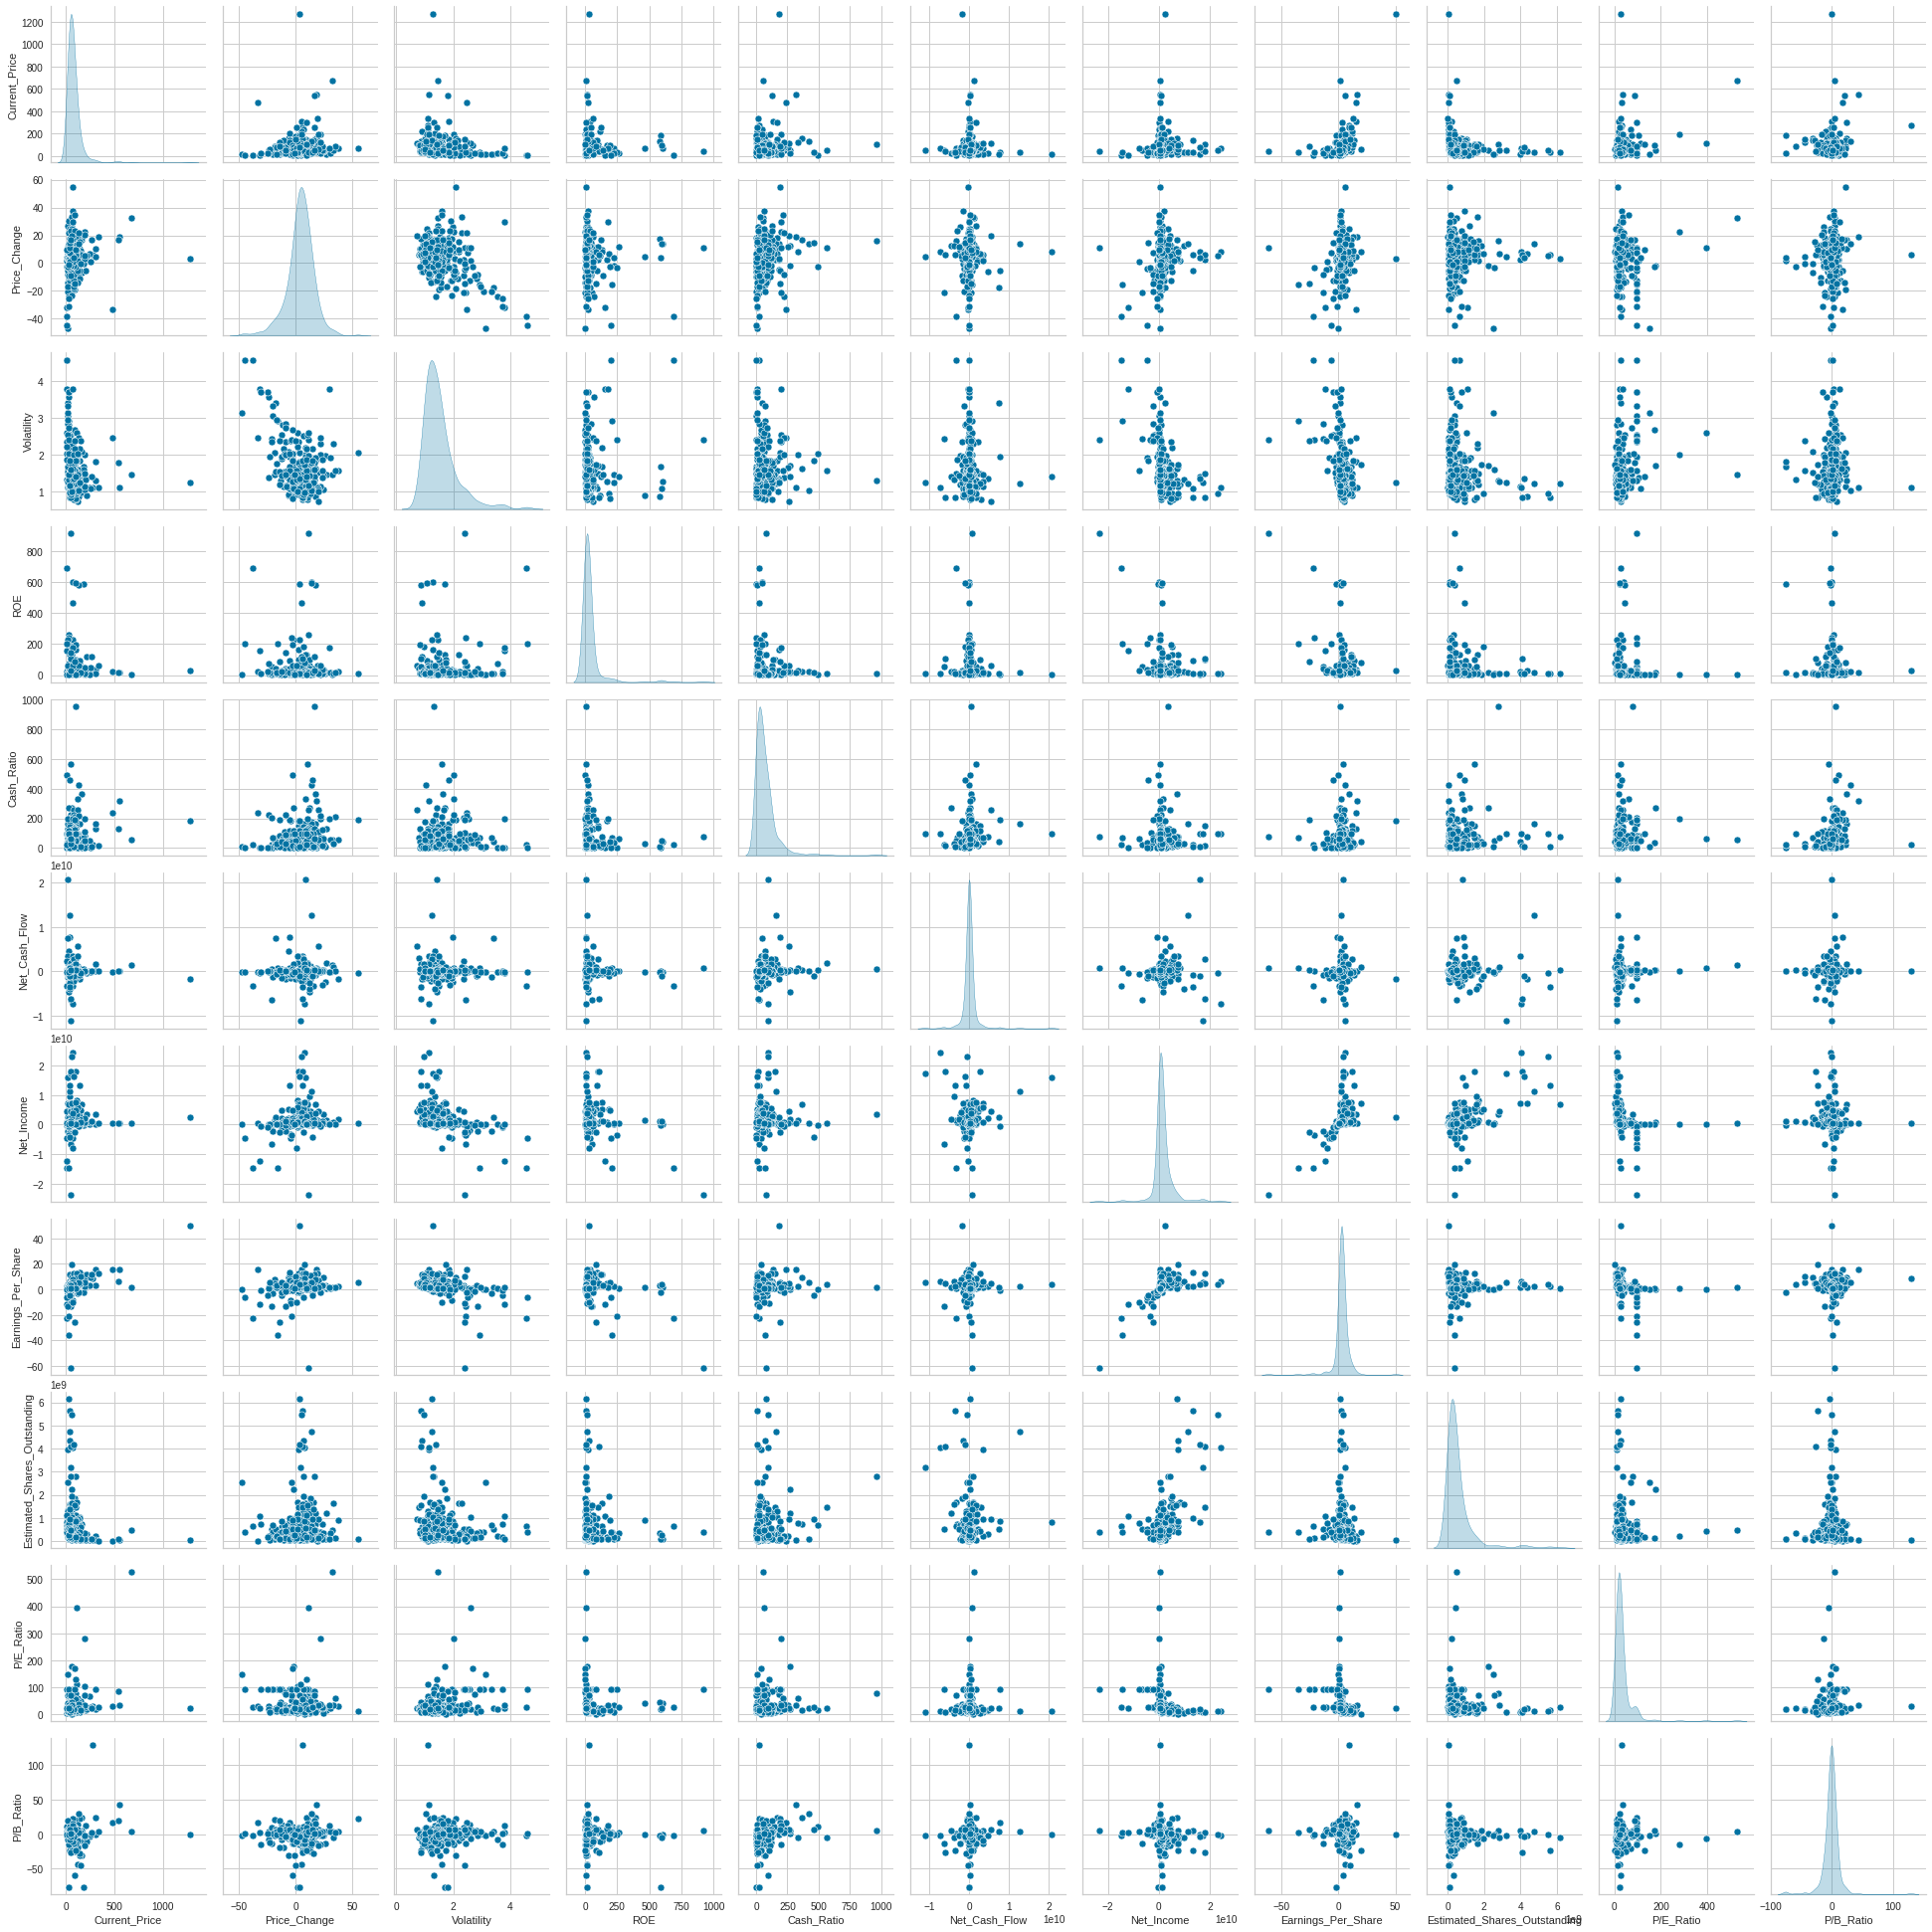

In [34]:
sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

This is a good visual of how these different columns are related. Right now we see a lot of linearity and clustering. We'll see how the models read this. Many of these have strong right-skewed distributions, which may be because of the negative values in the data. Right now there may be multicolinearity in the columns, but we can look into that after scaling the data.

# Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [37]:
# check for missing values
data.isnull().sum()

GICS_Sector                     0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

There are no missing entries in the dataset

In [36]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Length: 340, dtype: bool

There are no duplicated rows in the data.

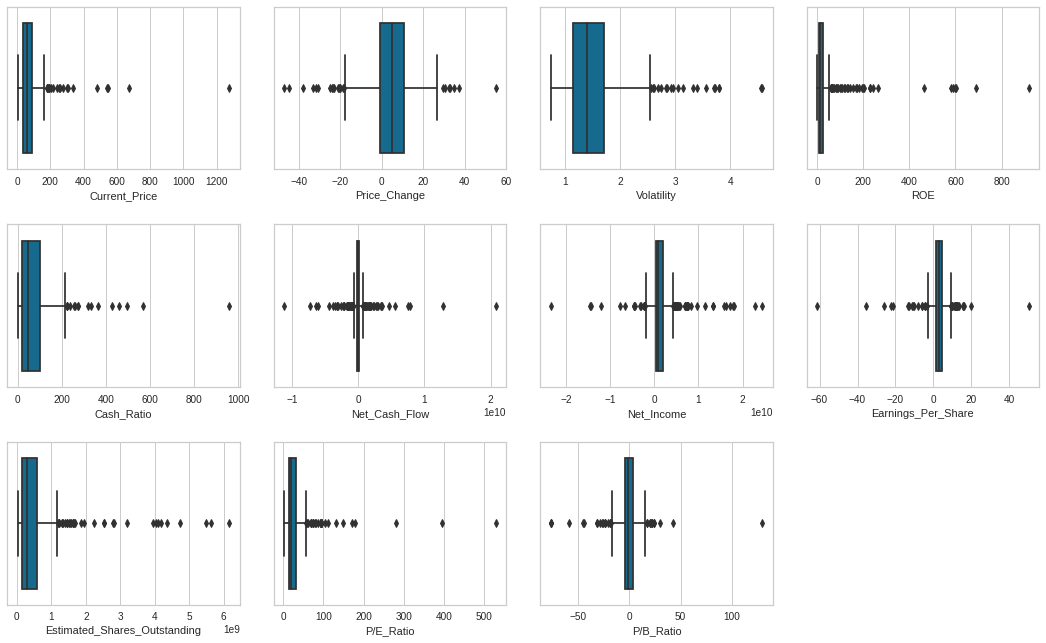

In [38]:
# Even though we've already seen the outliers in some of the EDA above, this will give us a good visual to compare when we check to make sure all have been treated
# Outlier Detection
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

As we saw in the EDA, there are quite a few columns with outliers. Since these throw the types of models that we are building off, we will treat most of these.

In [44]:
# functions to treat outliers by flooring and capping


def treat_outliers(data, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(data, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(data, c)

    return df

In [45]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(data, numerical_col)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

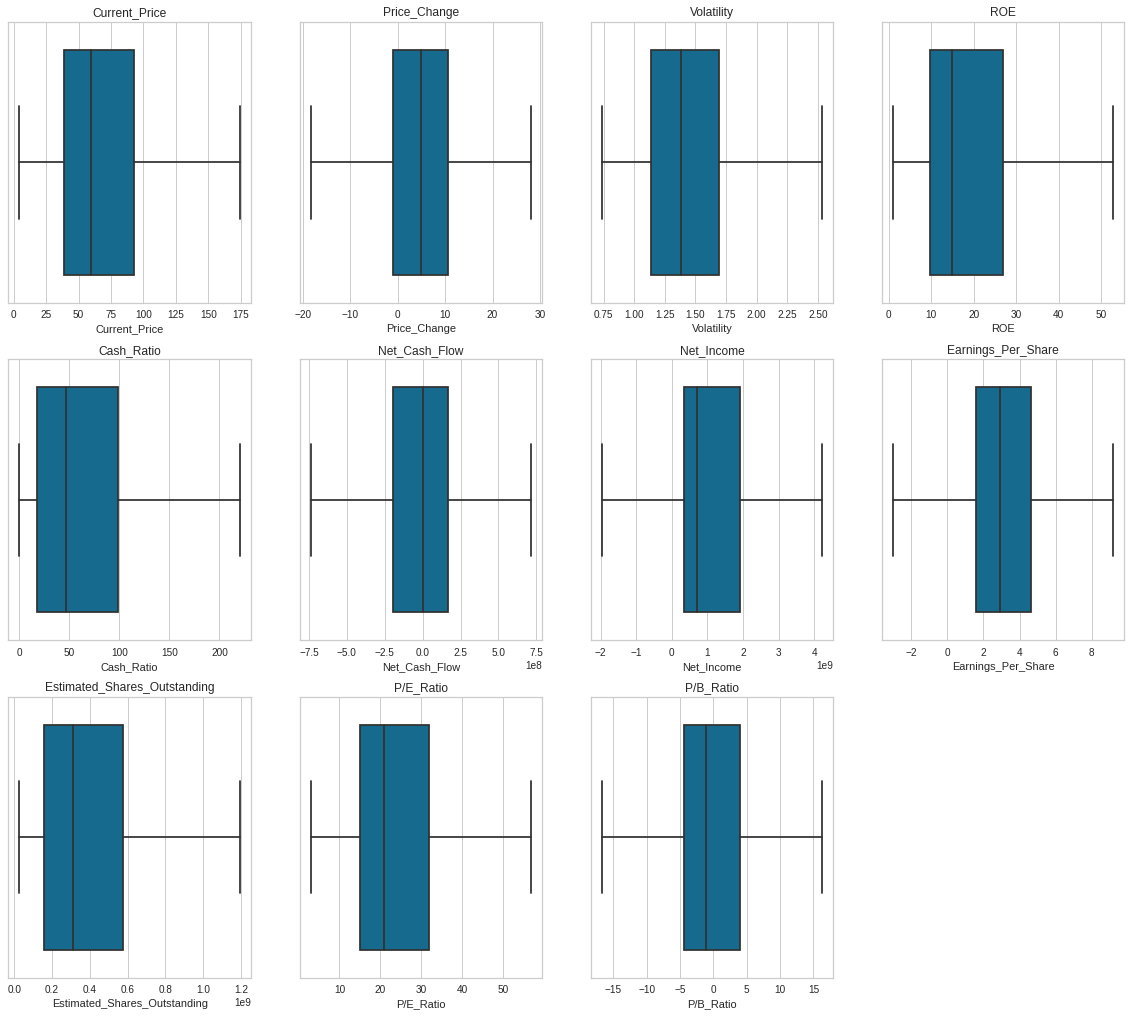

In [46]:
# Check to see if all Outliers are capped

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(df[variable], whis=1.5)
    plt.title(variable)

plt.show()

In [47]:
# Convert Object columns to float or numeric type columns, which is what the models require
for feature in data.columns:
    if data[feature].dtype == 'object':
       data[feature] = pd.Categorical(data[feature])
data.head()

GICS_Sector  Current_Price  Price_Change  Volatility    ROE  \
0             Industrials         42.350        10.000       1.687 52.875   
1             Health Care         59.240         8.339       2.198 52.875   
2             Health Care         44.910        11.301       1.274 21.000   
3  Information Technology         93.940        13.977       1.358  9.000   
4  Information Technology         55.320        -1.828       1.701 14.000   

   Cash_Ratio  Net_Cash_Flow     Net_Income  Earnings_Per_Share  \
0      51.000 -604000000.000 4219048125.000               9.214   
1      77.000   51000000.000 4219048125.000               3.150   
2      67.000  715386625.000 4219048125.000               2.940   
3     180.000 -240840000.000  629551000.000               1.260   
4     220.500  315120000.000  696878000.000               0.310   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                 668129938.500      3.718     -8.784  
1                1194521319.162     18.806     -8.750  
2                1194521319.162     15.276     -0.394  
3                 499643650.800     56.845      4.200  
4                1194521319.162     56.845      1.060

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   GICS_Sector                   340 non-null    category
 1   Current_Price                 340 non-null    float64 
 2   Price_Change                  340 non-null    float64 
 3   Volatility                    340 non-null    float64 
 4   ROE                           340 non-null    float64 
 5   Cash_Ratio                    340 non-null    float64 
 6   Net_Cash_Flow                 340 non-null    float64 
 7   Net_Income                    340 non-null    float64 
 8   Earnings_Per_Share            340 non-null    float64 
 9   Estimated_Shares_Outstanding  340 non-null    float64 
 10  P/E_Ratio                     340 non-null    float64 
 11  P/B_Ratio                     340 non-null    float64 
dtypes: category(1), float64(11)
memory usage: 30.1 KB


In [49]:
# Change dataframe name before we Scale the data
df = data.copy()

Other Preprocessing steps - I won't be changing the *negative values* in the data, because these are a natural part of the stock market, and give valuable information about the stocks.

##Data scaling

In [50]:
# variables used for clustering
numerical_col

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'P/E_Ratio',
 'P/B_Ratio']

There will be 11 columns scaled for clustering.

In [51]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[numerical_col].copy()
subset_scaled = scaler.fit_transform(subset)

Scaling these columns got rid of the exponents in Net Cash Flow and Estimated Shares Outstanding

In [52]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

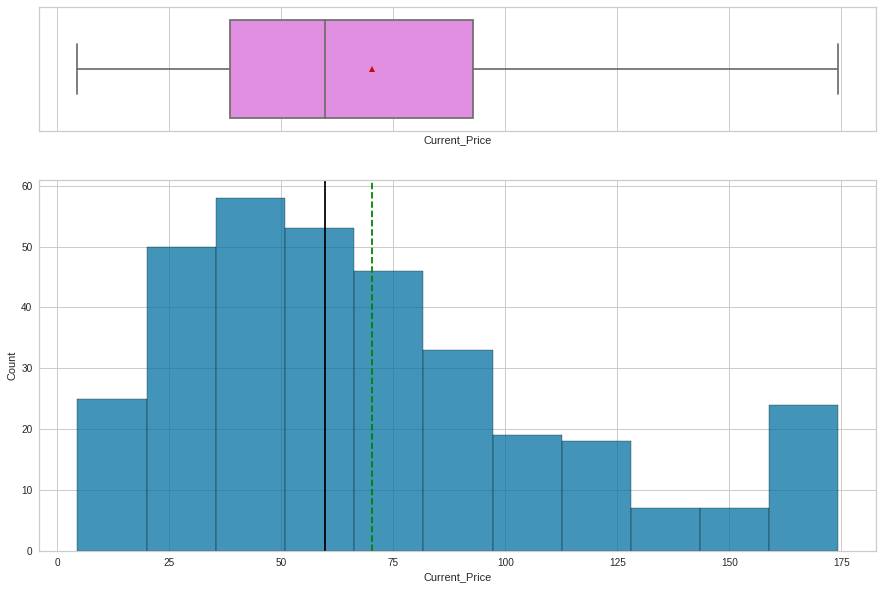

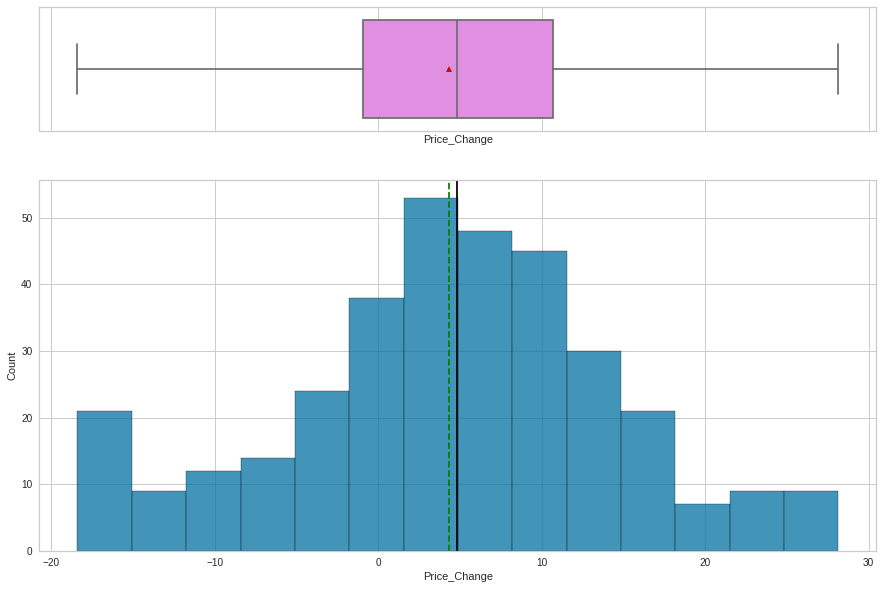

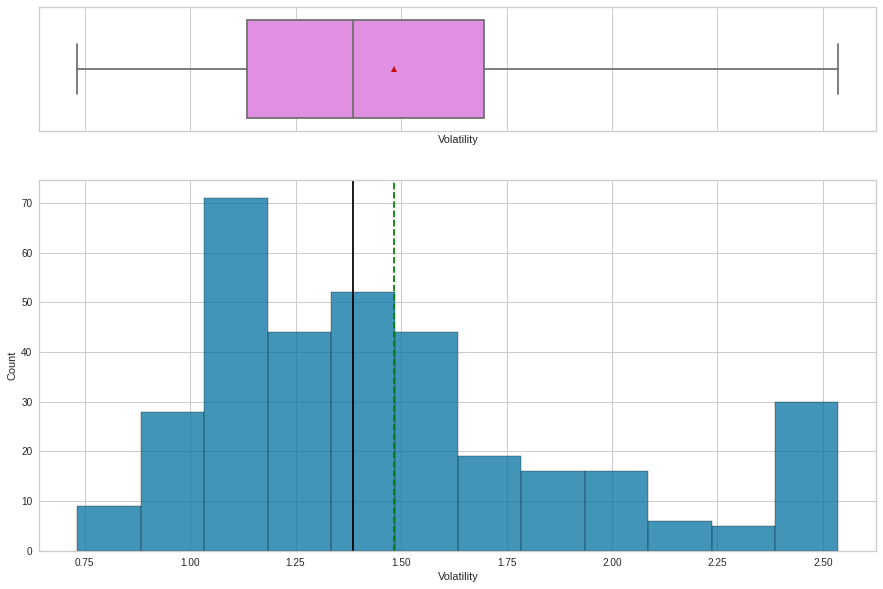

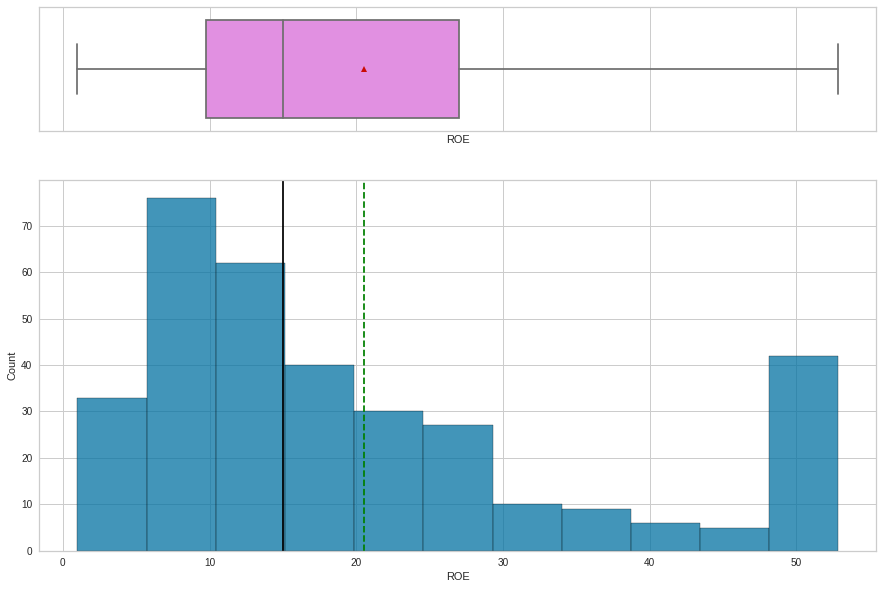

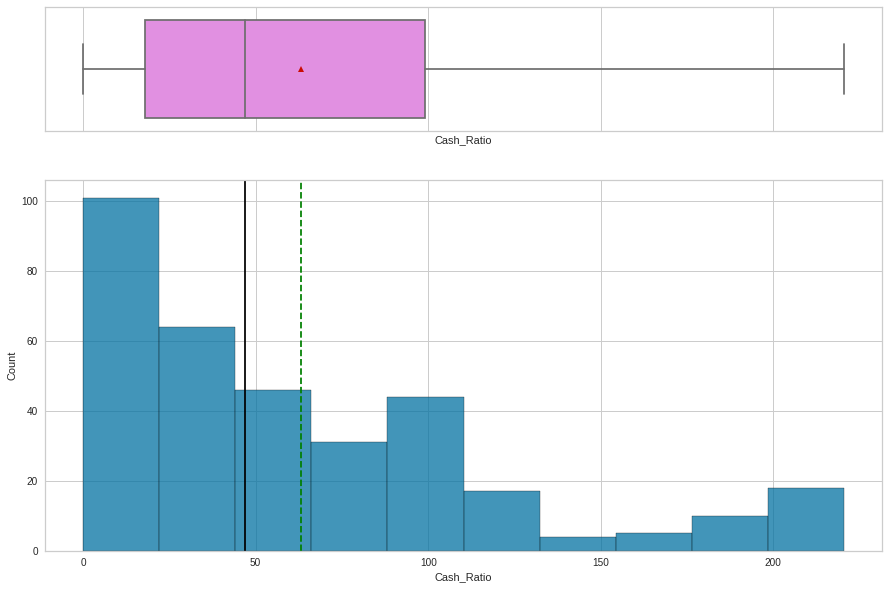

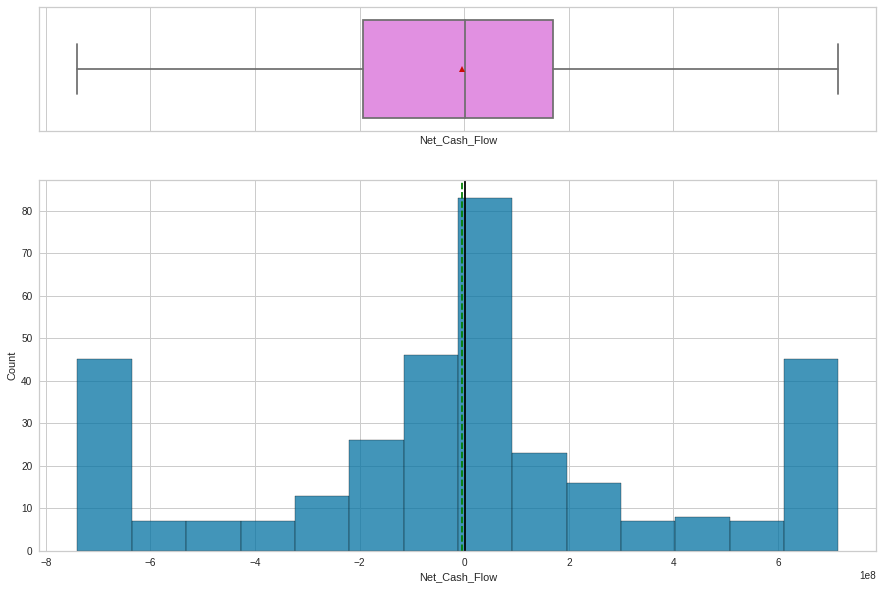

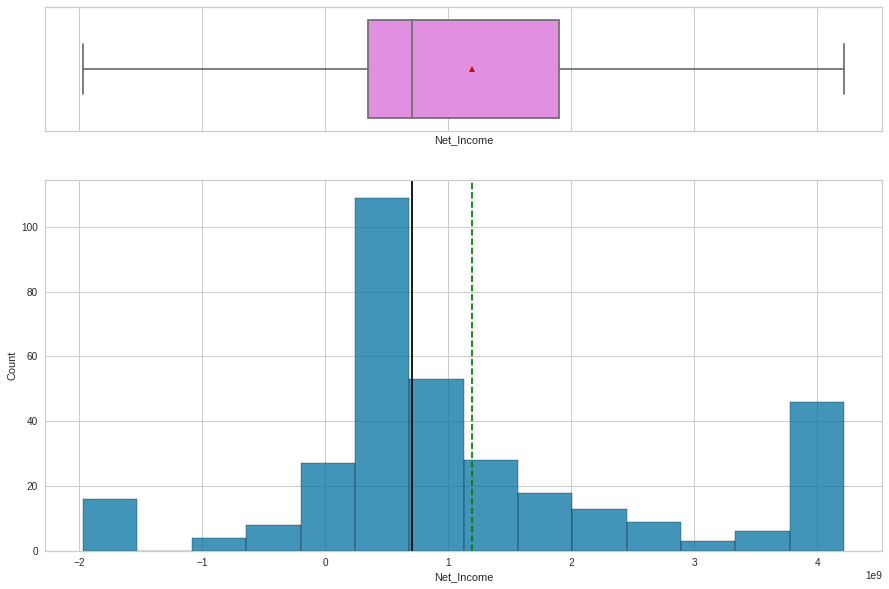

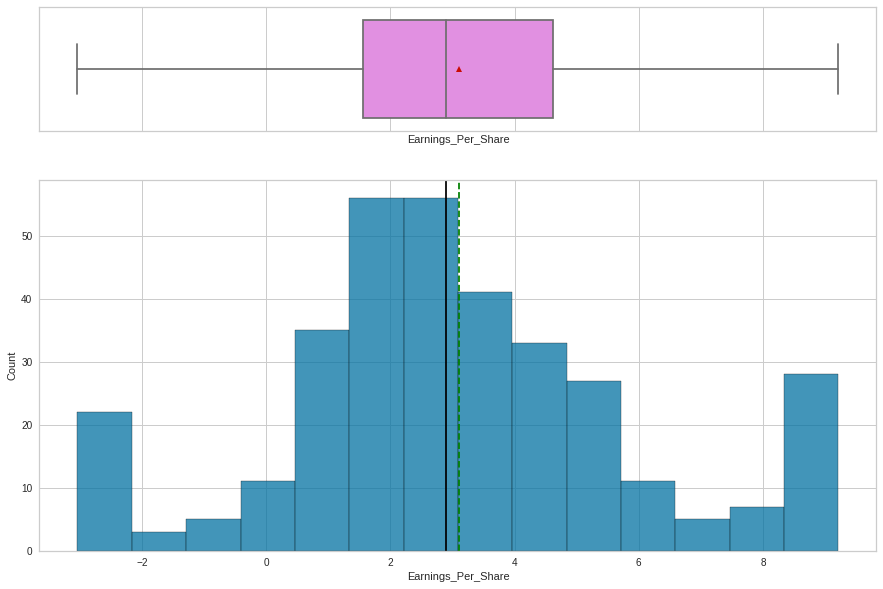

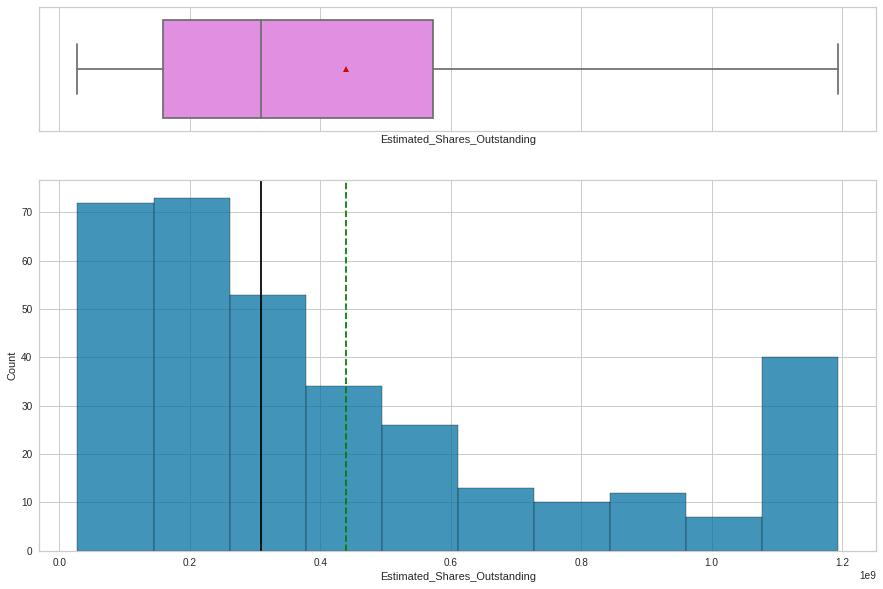

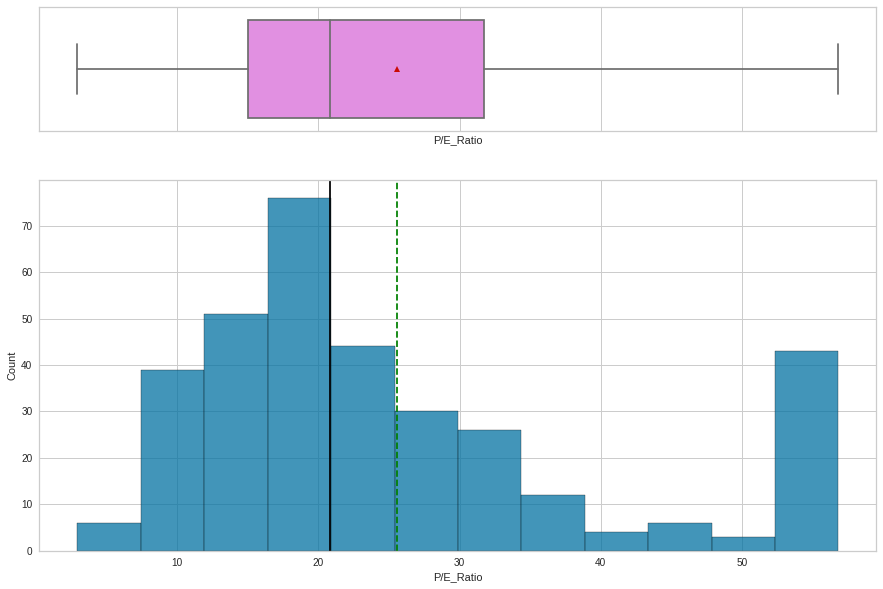

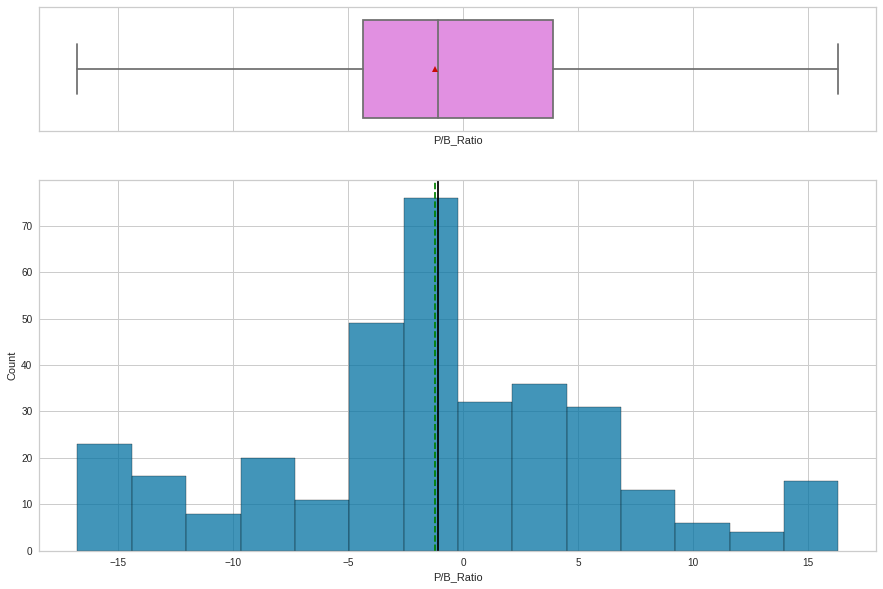

In [ ]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

# K-means Clustering

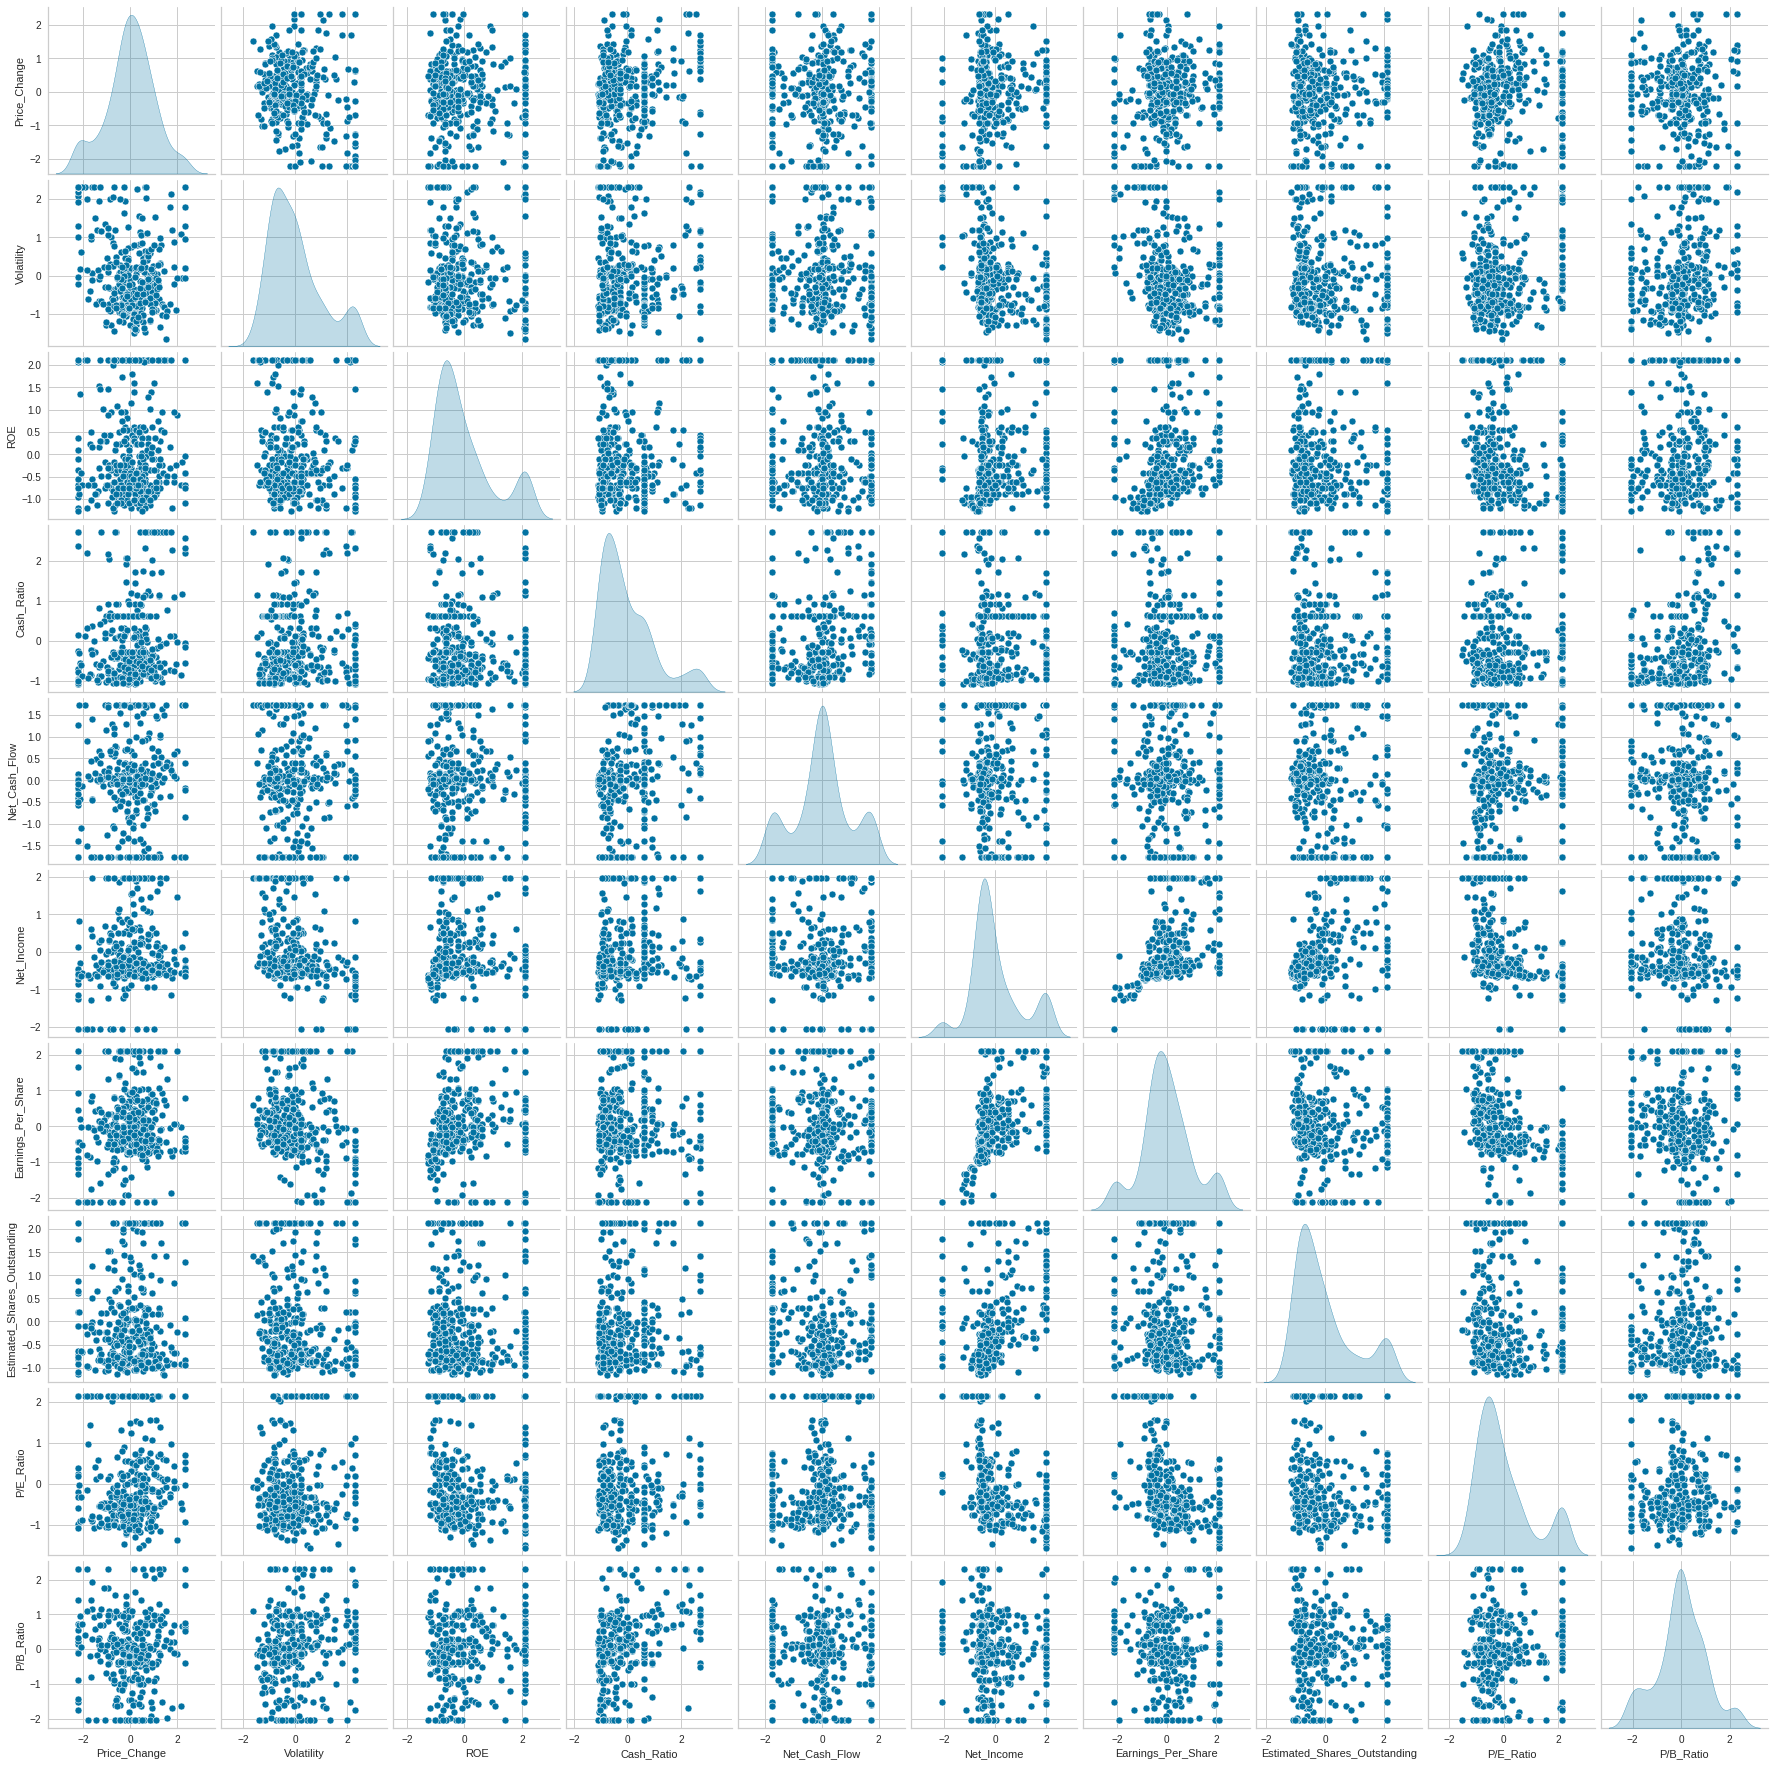

In [53]:
# Adding a compare scale using Z scores
techSuppAttr=subset_scaled_df.iloc[:,1:]
ZScaled=techSuppAttr.apply(zscore)
sns.pairplot(ZScaled,diag_kind='kde')

We can see that after scaling, much of the linearity is reduced between the variables, so we're on the right track. There are more groupings in the middle of the data.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

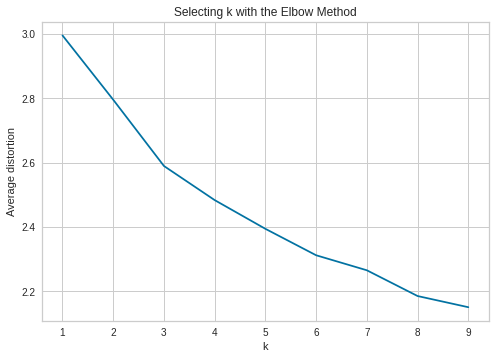

In [54]:
#Finding the optimal number of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ZScaled)
    prediction=model.predict(ZScaled)
    meanDistortions.append(sum(np.min(cdist(ZScaled, model.cluster_centers_, 'euclidean'), axis=1)) / ZScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


It looks like the biggest part of the bend is at 3, but let's check 4 as well.

In [55]:
# Let us first start with K = 3
first_model=KMeans(3)
first_model.fit(ZScaled)
prediction=first_model.predict(ZScaled)

#Append the prediction 
subset_scaled_df["GROUP"] = prediction
ZScaled["GROUP"] = prediction
print("Groups Assigned : \n")
subset_scaled_df.head()

Groups Assigned : 



Current_Price  Price_Change  Volatility    ROE  Cash_Ratio  Net_Cash_Flow  \
0         -0.651         0.549       0.448  2.117      -0.207         -1.434   
1         -0.258         0.388       1.569  2.117       0.239          0.133   
2         -0.591         0.676      -0.459  0.032       0.067          1.722   
3          0.549         0.936      -0.275 -0.754       2.005         -0.565   
4         -0.349        -0.600       0.479 -0.426       2.700          0.765   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0       1.977               2.115                         0.645     -1.494   
1       1.977               0.018                         2.125     -0.462   
2       1.977              -0.055                         2.125     -0.704   
3      -0.372              -0.636                         0.171      2.139   
4      -0.328              -0.964                         2.125      2.139   

   P/B_Ratio  GROUP  
0     -0.997      0  
1     -0.993      0  
2      0.109      0  
3      0.715      2  
4      0.301      2

This chart shows the first 5 columns, and we can see that each row has been assigned into one of 3 groups.

In [56]:
# Analyse the distribution of the data among the two groups (K=3)
subset_scaled_Cluster = subset_scaled_df.groupby(["GROUP"])
subset_scaled_Cluster.mean()

Current_Price  Price_Change  Volatility    ROE  Cash_Ratio  \
GROUP                                                               
0              0.039         0.325      -0.362  0.263       0.228   
1              0.058         0.071      -0.250 -0.106      -0.264   
2             -0.270        -0.742       1.460  0.006       0.643   

       Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
GROUP                                                  
0              0.073       1.421               0.545   
1             -0.050      -0.283               0.079   
2              0.079      -1.044              -1.096   

       Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
GROUP                                                      
0                             1.275     -0.486      0.022  
1                            -0.497     -0.171     -0.171  
2                            -0.033      1.350      0.601

**Group 0** has a low positive current price and price change, with little volatility, small cash flow, cash ratio. It has the highest net income and earning per share of the groups.

**Group 1** has the highest current price, positive, although small current price change, with even less volatility. ROE, cash ratio, net cash flow, net income are all negative. Earnings per share is very small.

**Group 2** has a negative current price and price change. It has the highest volatility, cash ratio. It has the lowest net income and earning per share.

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(


0    [[AxesSubplot(0.1,0.736957;0.235294x0.163043),...
1    [[AxesSubplot(0.1,0.736957;0.235294x0.163043),...
2    [[AxesSubplot(0.1,0.736957;0.235294x0.163043),...
dtype: object

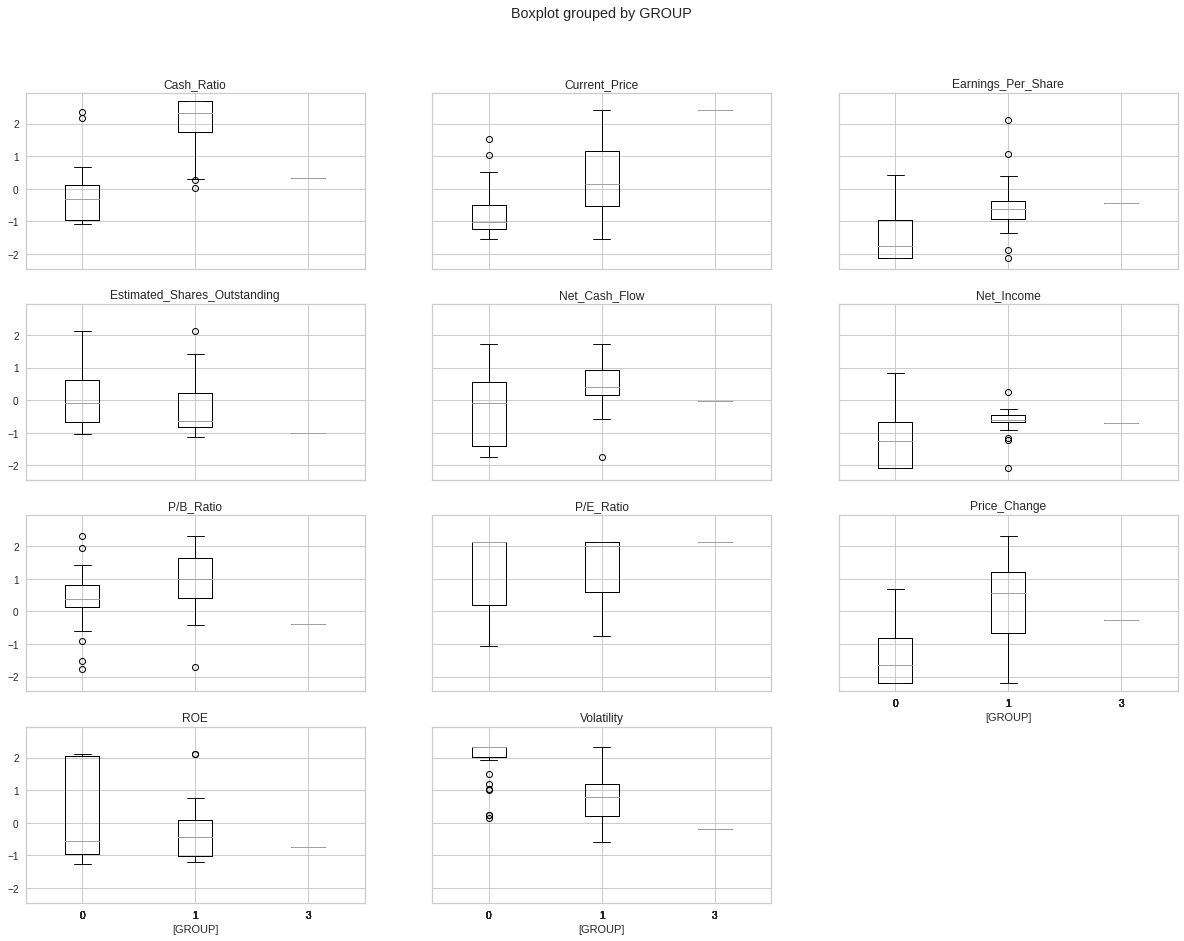

In [63]:
subset_scaled_Cluster.boxplot(by='GROUP', layout = (5,10), figsize=(20,15))

This shows how much of the data points are in each of these groupings. Group 0 seems to have a large amount of varied data points for Net Cash Flow, Group 2 has the same, but highest for Cash Ratio Volatility. Lowest Earnings and Net Income though. Group 1 seems to be a nice mix of everything in the middle.

In [64]:
# We'll next try with K=4 and check the clustering means
second_model=KMeans(4)
second_model.fit(ZScaled)
prediction=second_model.predict(ZScaled)

# Append the prediction
subset_scaled_df["GROUP"] = prediction
ZScaled["GROUP"] = prediction
print("Groups Assigned : \n")
subset_scaled_df.head()

Groups Assigned : 



Current_Price  Price_Change  Volatility    ROE  Cash_Ratio  Net_Cash_Flow  \
0         -0.651         0.549       0.448  2.117      -0.207         -1.434   
1         -0.258         0.388       1.569  2.117       0.239          0.133   
2         -0.591         0.676      -0.459  0.032       0.067          1.722   
3          0.549         0.936      -0.275 -0.754       2.005         -0.565   
4         -0.349        -0.600       0.479 -0.426       2.700          0.765   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0       1.977               2.115                         0.645     -1.494   
1       1.977               0.018                         2.125     -0.462   
2       1.977              -0.055                         2.125     -0.704   
3      -0.372              -0.636                         0.171      2.139   
4      -0.328              -0.964                         2.125      2.139   

   P/B_Ratio  GROUP  
0     -0.997      1  
1     -0.993      1  
2      0.109      1  
3      0.715      3  
4      0.301      3

First 5 rows that show they have been assigned to a Group

In [65]:
second_model_Cluster = subset_scaled_df.groupby(['GROUP'])
second_model_Cluster.mean()                                                

Current_Price  Price_Change  Volatility    ROE  Cash_Ratio  \
GROUP                                                               
0             -0.750        -1.426       1.929  0.204      -0.235   
1              0.100         0.186      -0.473  0.375       0.067   
2              0.079        -0.022      -0.290 -0.105      -0.389   
3              0.061         0.736       0.442 -0.251       1.451   

       Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
GROUP                                                  
0             -0.189      -1.307              -1.481   
1              0.085       1.627               0.721   
2             -0.067      -0.275               0.091   
3              0.246      -0.346              -0.344   

       Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
GROUP                                                      
0                             0.071      1.363      0.406  
1                             1.169     -0.629     -0.058  
2                            -0.521     -0.176     -0.294  
3                             0.267      0.598      0.869

**Group 0** has negative current price and price change. The highest volatility. Negative cash ratio, net cash flow, net income, and earnings per share. It has higher P/E and P/B ratio.

**Group 1** has low positive current price, with the highest positive price chace. Small positive volatility, net cash flow. Negative net income and earnings per share.

**Group 2** has the highest current price and lowest volatility. Cash ratio, net cash flow, income, and earnings per share are all positive. P/E and P/B raio are small negatives.

**Group 3** has a low positive current price and low negaitve price change. Medium volatility, with cash ratio, net cash flow, and net income all negative. Very small positive earnings per share. Low negaitve P/E and P/B ratios.

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(


0    [[AxesSubplot(0.1,0.736957;0.235294x0.163043),...
1    [[AxesSubplot(0.1,0.736957;0.235294x0.163043),...
2    [[AxesSubplot(0.1,0.736957;0.235294x0.163043),...
3    [[AxesSubplot(0.1,0.736957;0.235294x0.163043),...
dtype: object

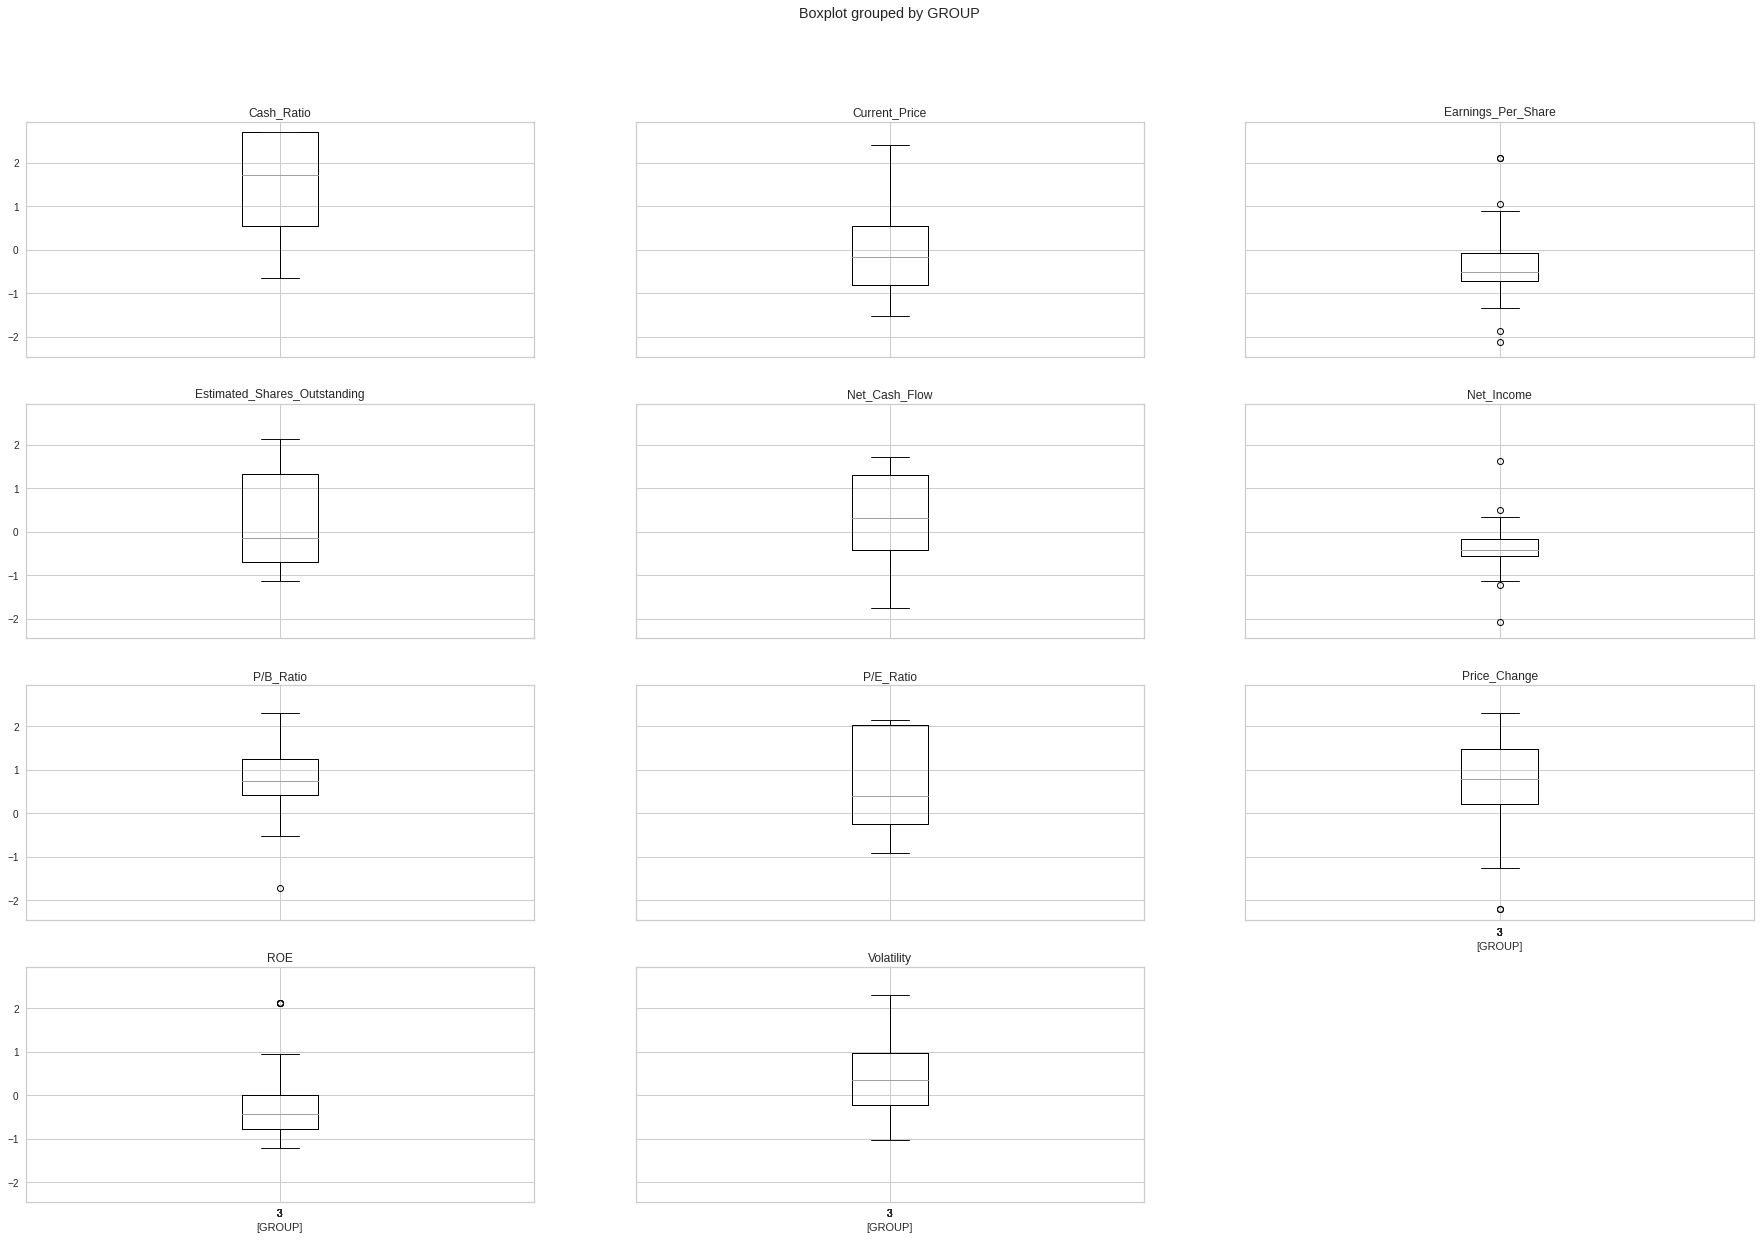

In [70]:
second_model_Cluster.boxplot(by='GROUP', layout = (5,10), figsize=(30,20))

I'm not sure why, but this graph is only showing boxplots for the last group. I changed the layout and size multiple times, but I can't get it to work right.

For n_clusters = 2, the silhouette score is 0.29200128531629255)
For n_clusters = 3, the silhouette score is 0.20466343355943128)
For n_clusters = 4, the silhouette score is 0.20664374673670982)
For n_clusters = 5, the silhouette score is 0.15620407558217067)
For n_clusters = 6, the silhouette score is 0.15536572554892078)
For n_clusters = 7, the silhouette score is 0.1422304787463918)
For n_clusters = 8, the silhouette score is 0.1276608115283755)
For n_clusters = 9, the silhouette score is 0.1370319240401281)


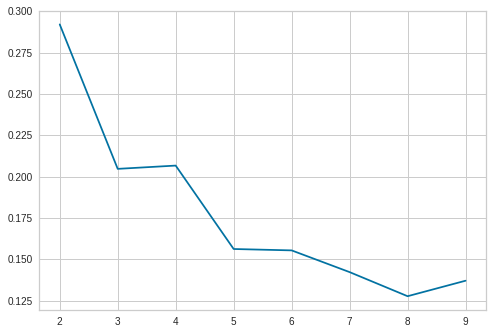

In [67]:
# Check Silhouette scores

sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

There is a big drop in the score between Clusters 4 to 5. 4 Clusters may preserve the best silhouette score, and has a slightly better score than 3 Clusters. Clusters closer to 1 are the best. 2 seems to show the best, but I can't see the point in splitting into only 2 groups.

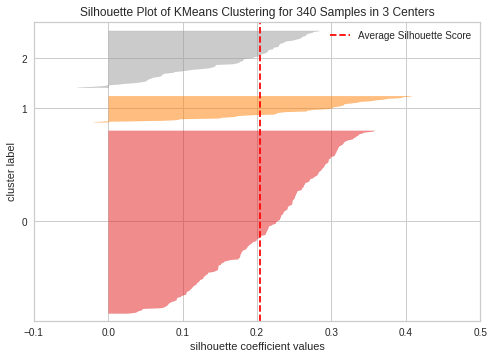

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
# finding optimal no. of clusters with silhouette coefficients
# with 3 Clusters
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

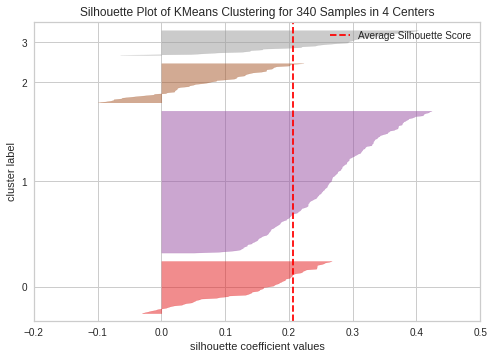

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
# with 4 Clusters
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [73]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [74]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

##Cluster Profiling

In [75]:
cluster_profile = df.groupby("K_means_segments").mean()

In [76]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["GICS_Sector"].count().values
)

In [77]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

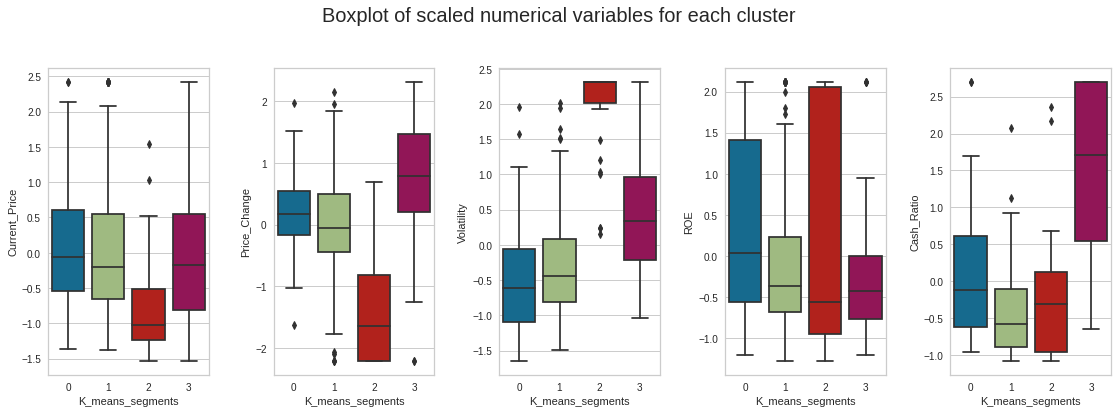

In [78]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

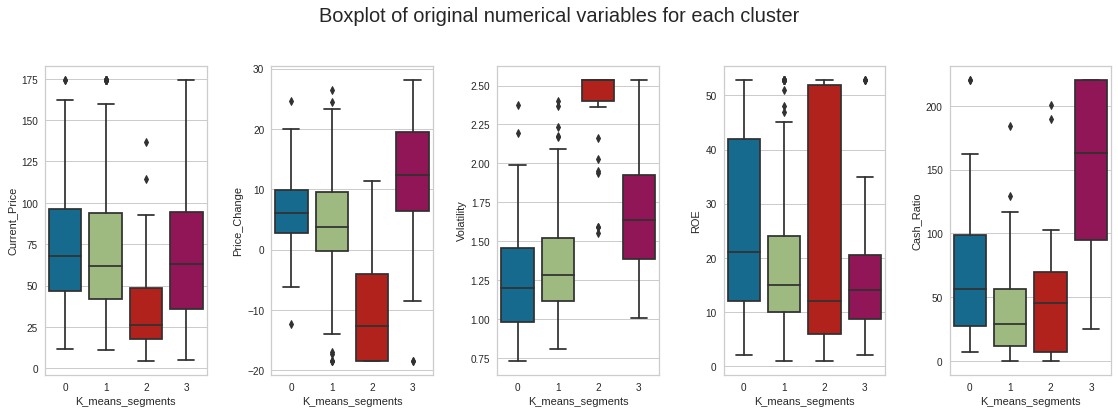

In [79]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

- **Cluster 0**:
    - This cluster contains slightly more expensive stocks, with the highest amount of net income and earnings per share
    - Medium high price change
    - Low volatility
    - High, varied range of ROE, medium low Cash Ratio
   
- **Cluster 1**:
    - Highest number of data points, possibly making it a very average category
    - Current price 74, price change 4
    - 2nd lowest volatility
    - Lowest cash ratio but Income and Earnings still positive
    
- **Cluster 2**:
    - Lowest current price; only 33 companies in this group
    - Highest volatility
    - Highest P/E ratio
    - Lowest net Income and Earnings of groups


- **Cluster 3**:
    - Highest positive price change
    - Highest cash ratio and ROE and P/B ratio
    - Medium volatility
    - Third highest current price and third highest net income

In [111]:
# let's see the names of the sectors in each cluster
for cl in df["K_means_segments"].unique():
    print(
        "The",
        df[df["K_means_segments"] == cl]["GICS_Sector"].nunique(),
        "Sectors in cluster",
        cl,
        "are:",
    )
    print(df[df["K_means_segments"] == cl]["GICS_Sector"].unique())
    print("-" * 100, "\n")

The 10 Sectors in cluster 0 are:
['Industrials', 'Health Care', 'Financials', 'Consumer Staples', 'Energy', 'Consumer Discretionary', 'Utilities', 'Information Technology', 'Telecommunications Services', 'Materials']
Categories (11, object): ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', ..., 'Materials',
                          'Real Estate', 'Telecommunications Services', 'Utilities']
---------------------------------------------------------------------------------------------------- 

The 10 Sectors in cluster 3 are:
['Information Technology', 'Health Care', 'Consumer Discretionary', 'Materials', 'Real Estate', 'Financials', 'Industrials', 'Telecommunications Services', 'Energy', 'Consumer Staples']
Categories (11, object): ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', ..., 'Materials',
                          'Real Estate', 'Telecommunications Services', 'Utilities']
---------------------------------------------------------------

# Hierarchical Clustering

In [80]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7418076197271979.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6750242070048944.
Cophenetic correlation for Euclidean distance and average linkage is 0.7744552213155067.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.5699839203214734.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7225085834296034.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.3156567869199773.
Cophenetic correlation for Chebyshev distance and average linkage is 0.746049226086468.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.6507532155934819.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6881452414467742.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3357512480881215.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6999883753600029.
Cophenetic cor

Highest correlation occurs with Euclidean and average linkage in this model at 77.4%. Second highest is Cityblock and average linkage at 76.2%.
Worst correlation is Chebyshev with complete linkage with 31.5%  We'll go with Euclidean and average linkage.

In [81]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7744552213155067, which is obtained with Euclidean distance and average linkage.


In [82]:
# Let's explore different linkage methods using Euclidean distance only

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7418076197271979.
Cophenetic correlation for complete linkage is 0.6750242070048944.
Cophenetic correlation for average linkage is 0.7744552213155067.
Cophenetic correlation for centroid linkage is 0.774855600850982.
Cophenetic correlation for ward linkage is 0.6732754007481857.
Cophenetic correlation for weighted linkage is 0.5699839203214734.


In [83]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.774855600850982, which is obtained with Euclidean distance and centroid linkage.


In [87]:
# Let's explore different linkage methods using Cityblock distance only

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="Cityblock", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "cityblock"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6988716115431788.
Cophenetic correlation for complete linkage is 0.7260914243389123.
Cophenetic correlation for average linkage is 0.7624160518151233.
Cophenetic correlation for weighted linkage is 0.7368086461001212.


The highest correlation using the Cityblock method is average with 76.2%, so we'll choose Euclidean distance with centroid linkage as a better model.

###Checking Dendograms

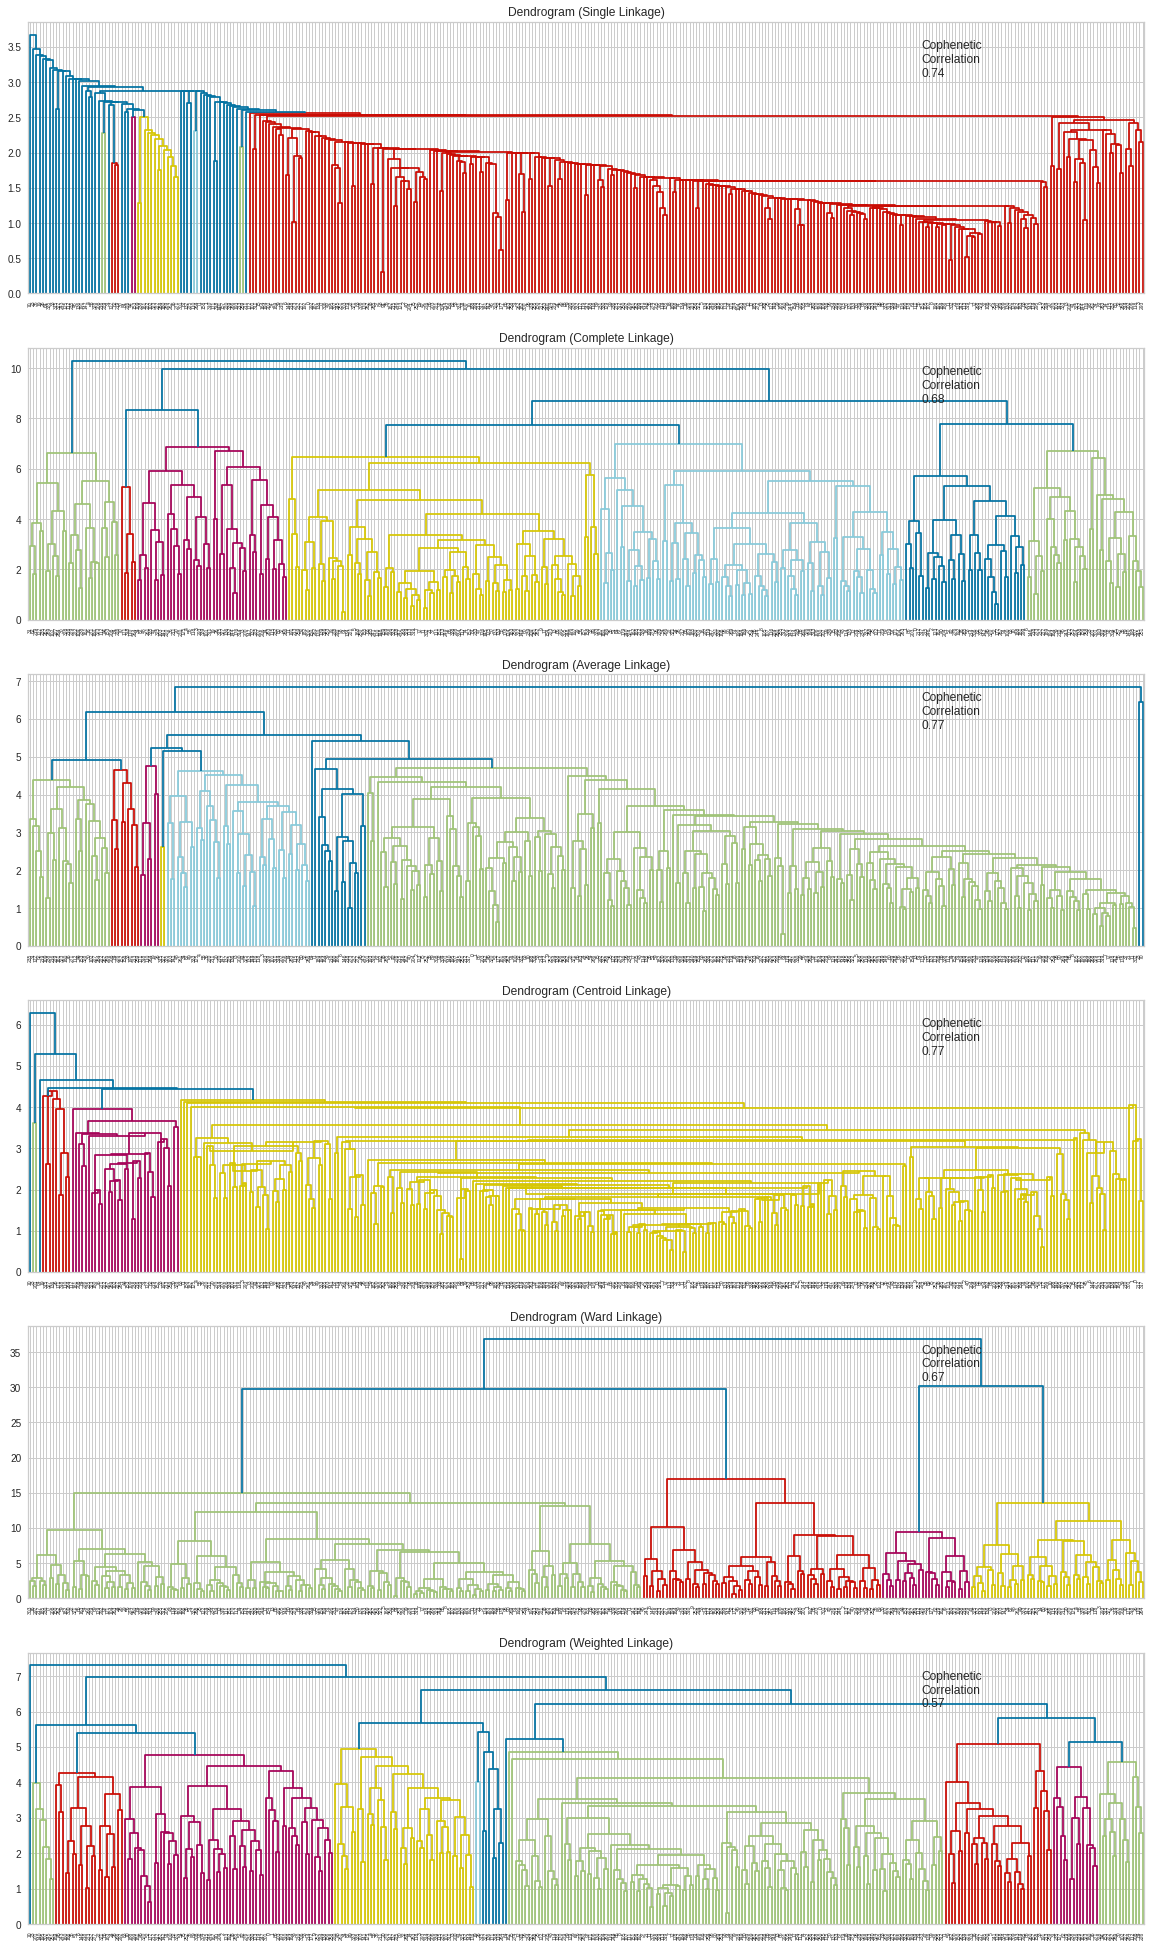

In [88]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 35))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Observations


*   The cophenetic correlation is highest for Centroid and Average linkage 
*   I like the more spread out distribution of points with the Average linkage, so I'll create a model using that first
*   3 appears to be the appropriate number of clusters from the dendrogram to capture the majority of linkages



###Creating a Model using sklearn

In [89]:
# Sklearn does not have a centroid linkage model available, so have to switch
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [92]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [93]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [94]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

**Cluster 0** seems to have the most average figures, with none of the highest values in it.

**Cluster 1** contains stocks with the highest current price, the highest volatility, the highest cash raio, and the highest earning per share. They also have the highest P/E and P/B raios, and the most K means segments.

**Cluster 2** stocks show the highest positive price change, highest ROE, cash ratio, net cash flow, and net income.

ValueError: ignored

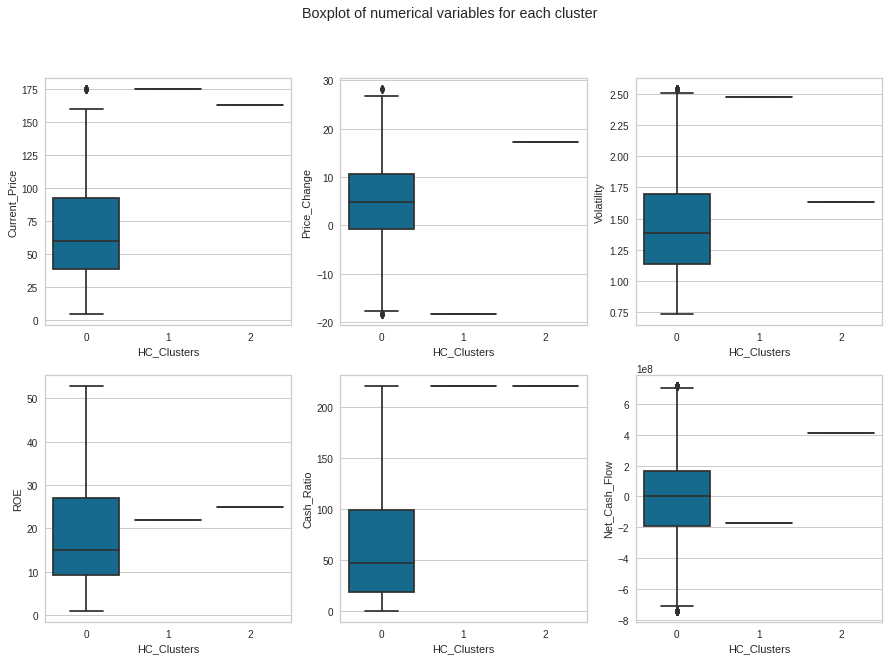

In [103]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

I'm not able to make this boxplot work very well either.

In [104]:
# let's see the names of the sectors in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["GICS_Sector"].nunique(),
        "Sectors in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print("-" * 100, "\n")

The 11 Sectors in cluster 0 are:
['Industrials', 'Health Care', 'Information Technology', 'Consumer Staples', 'Utilities', ..., 'Real Estate', 'Materials', 'Consumer Discretionary', 'Energy', 'Telecommunications Services']
Length: 11
Categories (11, object): ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', ..., 'Materials',
                          'Real Estate', 'Telecommunications Services', 'Utilities']
---------------------------------------------------------------------------------------------------- 

The 1 Sectors in cluster 2 are:
['Health Care']
Categories (11, object): ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', ..., 'Materials',
                          'Real Estate', 'Telecommunications Services', 'Utilities']
---------------------------------------------------------------------------------------------------- 

The 1 Sectors in cluster 1 are:
['Consumer Discretionary']
Categories (11, object): ['Consumer Discretionary', 'Co



> **Cluster Analysis**

- **Cluster 0**
   - There are 11 sectors in this cluster
   - These stocks had the lowest current price, the lowest positive price change, and the least volatility
   - Lowest Earnings per Share
   - This cluster is probably so average because it contained the highest number of stocks and different sectors, which will naturally average everything out
   
   
- **Cluster 1**
   - Highest earnings per share
   - Highest current price
   - Most volatility
   - Contains only stocks from Consumer Discretionary in it
   
   
- **Cluster 2**
   - Highest positive price change
   - Highest ROE, cash ratio, net cash flow, and net income
   - Lowest P/E ratio
   - Contains only stocks from Health Care

# K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution? 
  
  **Answer:**  Kmeans took the least time for execution and I found the process more understandable.
- Which clustering technique gave you more distinct clusters, or are they the same? 

  **Answer:**  Kmeans functioned better with 4 clusters, while HC wanted 3. The clusters were much better distributed in Kmeans though.
- How many observations are there in the similar clusters of both algorithms? 

  **Answer:**  Kmeans recommended 4 clusters with 69, 188, 33, and 52 entries in them. HC created 3 clusters, but only put one type of sector in two of them, so they don't seem as useful as the Kmeans clusters.
   

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

  **Answer** The biggest difference I saw was that Kmeans also makes it easier to see which segments are not performing as well, but I didn't see that so clearly with HC. Also, the way HC clustered the majority of the stocks together would make it difficult to explain to Trade&Ahead what attributes differentiate these sectors or stocks.

## Actionable Insights and Recommendations

- According to K means you the best groupings if a customer is good with volatility but wants the best return are: Industrials, Health Care, Financials, Consumer Staples, Energy, Consumer Discretionary, Utilities, Information Technology, Telecommunications Services, and Materials.

- According to K means, if a customer does not like volatility but still wants some good performance: Information Technology, Health Care, Consumer Discretionary, Materials, Real Estate, Financials, Industrials, Telecommunications Services, Energy, and Consumer Staples.

- According to K means, the worst set of stocks because of high volatility and low earnings are: Energy, Industrials, Materials, Information Technology, Real Estate, and Financials.

- According to Hierarchical clustering the sector with the best outcome is: Health care. This is because of Highest positive price change, Highest ROE, good cash ratio, net cash flow, and net income; Lowest P/E ratio.

- According Hierarchical clustering the sector with the best return is: Consumer Discretionary. It is highly volatile but has the best return.

- According to Hierarchical clustering, all other sectors are a bit boring where stocks do not cost much but also do not return much.



**To combine the Insights from these two models and give the best, streamlined Recommendation:**

For a customer who is *good with volatility and wants the best return* then look at stocks in the **Consumer Discretionary** sector. For diversification include: Consumer Staples, Health Care, Utilities, and Telecommunications.

For the customer who *does not like volatility but still would like a decent return* on investment then look at stocks in the **Health Care** sector. For diversification include: Consumer Staples and Discretionary, Utilities, and Telecommunications.